# **Notebook for preprocessing the diagnosis and clinical data**

## Some useful links to documentation and other resources:

* **google group for ADNI questions:** https://groups.google.com/g/adni-data
* **ADNI FAQS page:** http://adni.loni.usc.edu/support/
* **ADNI commonly used talbe:** http://adni.loni.usc.edu/wp-content/themes/freshnews-dev-v2/documents/bio/inst_commonly_used_table.pdf
* **ADNI tables info:** http://adni.loni.usc.edu/wp-content/themes/freshnews-dev-v2/documents/bio/inst_about_data.pdf
* **R code for example and tables understanding:** https://github.com/ZhouYeJava/AlzheimerDisease/blob/master/ADNI_Data_Generator_New.R

### **Importamos librerias**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

### **Montamos Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


### **Creamos dos dataframes**


1.   df_clinical -> ADMC_CLINICALVARIABLES_16May2016.csv
2.   df_diagnosis -> DXSUM_PDXCONV_ADNIALL.csv

In [ ]:
#path_clinical_variables = '/content/drive/MyDrive/Doctorado/materias/Laboratorio de datos/TPs/TP Final/ADMC_CLINICALVARIABLES_16May2016.csv'
path_clinical_variables = '/gdrive/My Drive/datos ADNI/ADMC_CLINICALVARIABLES_16May2016.csv'
path_diagnosis = '/gdrive/MyDrive/datos ADNI/DXSUM_PDXCONV_ADNIALL.csv'

df_clinical = pd.read_csv(path_clinical_variables, low_memory=False)
df_diagnosis = pd.read_csv(path_diagnosis, low_memory=False)

print('\n============ DF clinical variables ==========')
print(f'Total number of entries: {len(df_clinical)}')
print(f'Total number of columns: {len(df_clinical.columns)}')

print('\n============ DF diagnosis ==========')
print(f'Total number of entries: {len(df_diagnosis)}')
print(f'Total number of columns: {len(df_diagnosis.columns)}')


============ DF clinical variables ==========
Total number of entries: 15143
Total number of columns: 394

============ DF diagnosis ==========
Total number of entries: 12629
Total number of columns: 54


In [ ]:
display(df_clinical.head(5))
print('\n')
display(df_diagnosis.head(5))

,RID,VISCODE,ORIGPROT.x,COLPROT,SITEID,USERDATE,USERDATE2,EXAMDATE,COT1LIST,COT2LIST,COT3LIST,COT1SCOR,COT2SCOR,COT3SCOR,COP1COMP,COCOMND,COP2COMP,COCONSTR,COP3COMP,COT4LIST,COT4TOTL,COP4COMP,CONAME,COP5COMP,COIDEA,COP6COMP,COORIEN,COP7COMP,CO8NURSE,CO8MAGAZ,CO8WIZRD,CO8WIZRR,CO8VAN,CO8VANR,CO8LEPRD,CO8LEPRR,CO8SALE,CO8SALER,CO8SEA,CO8SEAR,CO8TRAIN,CO8TRAIR,CO8COIN,CO8COINR,CO8SHIP,CO8SHIPR,CO8INST,CO8INSTR,CO8MAP,CO8MAPR,CO8AXE,CO8AXER,CO8BOARD,CO8BOARR,CO8CARRT,CO8CARRR,CO8MILK,CO8MILKR,CO8VOL,CO8VOLR,CO8FORST,CO8FORSR,CO8ANCHR,CO8ANCRR,CO8GEM,CO8GEMR,CO8CAT,CO8CATR,CO8FUND,CO8FUNDR,CO8EDGE,CO8EDGER,CO8CAKE,CO8CAKER,COP8COMP,COINSTRC,COCOMPRE,COWRDFND,COLANG,CONMCXLA,CONMCXLB,CONMCXLC,COP14CMP,WORDLIST,Q1UNABLE,Q1TR1,Q1TR2,Q1TR3,Q2UNABLE,Q2TASK,Q3UNABLE,Q3TASK1,Q3TASK2,Q3TASK3,Q3TASK4,Q4UNABLE,Q4TASK,Q5UNABLE,Q5TASK,Q6UNABLE,Q6TASK,Q7UNABLE,Q7TASK,Q8UNABLE,Q8WORD1,Q8WORD1R,Q8WORD2,Q8WORD2R,Q8WORD3,Q8WORD3R,Q8WORD4,Q8WORD4R,Q8WORD5,Q8WORD5R,Q8WORD6,Q8WORD6R,Q8WORD7,Q8WORD7R,Q8WORD8,Q8WORD8R,Q8WORD9,Q8WORD9R,Q8WORD10,Q8WORD10R,Q8WORD11,Q8WORD11R,Q8WORD12,Q8WORD12R,Q8WORD13,Q8WORD13R,Q8WORD14,Q8WORD14R,Q8WORD15,Q8WORD15R,Q8WORD16,Q8WORD16R,Q8WORD17,Q8WORD17R,Q8WORD18,Q8WORD18R,Q8WORD19,Q8WORD19R,Q8WORD20,Q8WORD20R,Q8WORD21,Q8WORD21R,Q8WORD22,Q8WORD22R,Q8WORD23,Q8WORD23R,Q8WORD24,Q8WORD24R,Q9TASK,Q10TASK,Q11TASK,Q12TASK,Q13UNABLE,Q13TASKA,Q13TASKB,Q13TASKC,TIMEEND,TIMEBEGAN,Q1SCORE,Q2SCORE,Q3SCORE,Q4SCORE,Q5SCORE,Q6SCORE,Q7SCORE,Q8SCORE,Q9SCORE,Q10SCORE,Q11SCORE,Q12SCORE,TOTSCORE,Q13SCORE,TOTAL13,ORIGPROT.y,RBMID,RECDATE,A1MICRO,A2MACRO,AACT,AAT,ACE,ACTH,ADIPNCTN,AFP,AGRP,ANG2,ANGTNSNG,APOAI,APOAII,APOAIV,APOB,APOCI,APOCIII,APOD,APOE,APOH,AR,AXL,B2M,BDNF,BLC,BMP6,BNP,BTC,C3,CA125,CA199,CALBINDN,CALCITNN,CD40,CD40L,CD5L,CEA,CGA,CKMB,CLU,CNTF,CMPLMNFH,CORTISOL,CPEPTIDE,CRP,CTGF,CYSTATNC,EGF,EGFR,EPTHLDNA,ENRAGE,EOTAXIN1,EOTAXIN3,EPO,EPR,ESELECTN,ET1,FABP,FACTRVII,FAS,FASL,FETUINA,FGF4,FGFBASI,FIBRINGN,FRTN,FSH,G,GH,GLP1TO,GLUCAGON,GRNLCMCS,GROALPH,GSTALP,HAPTGLBN,HBEGFGF,HCC4,HGF,HSP60,I3,ICAM,IFNGAMMA,IGA,IGE,INSLGFBP,IGFI,IGM,IL1ALPHA,IL1BETA,IL10,IL11,IL12P40,IL12P70,IL13,IL15,IL16,IL18,IL1R,IL2,IL25,IL3,IL4,IL5,IL6,IL6R,IL7,IL8,INSULIN,IP,KIM1,LEPTIN,LH,LOX,A,LYMPHTCT,MCP1,MCP2,MCP3,MCP4,MCLNSF1,MLNDMLDL,MDC,MCRPHMIF,MI,MCRPHIP1,MIPRT1B,MCRPHIP3,MMP1,MMP10,MMP2,MMP3,MMP7,MMP9,MM9T,MYLDPIF1,MPO,MYOGLOBN,NTRPHGAL,NGFBETA,NRCAM,OSTEPNTN,PAI1,PAP,P,PLMNRARC,PDGF,PLGF,PPP,PRL,PROGSTRN,PRNSLNIN,PRNSLNTT,PSAF,PYY,RCPTRFRD,RANTES,RESISTIN,S100B,SAP,SCF,SECRETIN,SRMGLTOT,SHBG,SOD1,SORTILIN,TBG,TECK,TSTSTRNT,TF,TFF3,TGFAL,TGFB,THP,THRMBSP1,TSSINHM1,TM,TNC,TNFALPHA,TNFBETA,T,THRMBPTN,TNFRAILR,TRNSFRRN,TSH,TTR,VCAM,VEGF,VITRNCTN,VKDPS,VWF,PTID,PTGENDER,AGE,PTEDUCAT,PTETHCAT,PTRACCAT,DX.bl,APOE4,DXCHANGE,RCT20,RCT19,RCT392,RCT11,RCT8,SPARE_AD,TAU,ABETA142,PTAU181P,ADNI_MEM,ADNI_EF,VSWEIGHT,VSWTUNIT,VSHEIGHT,VSHTUNIT
0,2,bl,ADNI1,ADNI1,107.0,2014-08-25,NaN,2005-09-08,NaN,NaN,NaN,5.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,Yes,NaN,Yes,NaN,Yes,NaN,No,NaN,No,NaN,Yes,NaN,No,NaN,No,NaN,Yes,NaN,No,NaN,No,NaN,No,NaN,No,NaN,No,NaN,No,NaN,No,NaN,No,NaN,No,NaN,No,NaN,No,NaN,Yes,NaN,No,NaN,NaN,None,None: participant understands,None,None: participant speaks clearly and/or is und...,12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.67,0.0,0.0,5.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,10.67,3.0,18.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

,Phase,ID,RID,PTID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,DXCHANGE,DXCURREN,DXCONV,DXCONTYP,DXREV,DXNORM,DXNODEP,DXMCI,DXMDES,DXMPTR1,DXMPTR2,DXMPTR3,DXMPTR4,DXMPTR5,DXMPTR6,DXMDUE,DXMOTHET,DXMOTHSP,DXDSEV,DXDDUE,DXAD,DXADES,DXAPP,DXAPROB,DXAMETASP,DXAOTHRSP,DXAPOSS,DXAATYSP,DXAMETSP,DXAOTHSP,DXPARK,DXPARKSP,DXPDES,DXPCOG,DXPATYP,DXPOTHSP,DXDEP,DXDEPSP,DXOTHDEM,DXODES,DXOOTHSP,DXCONFID,DIAGNOSIS,update_stamp
0,ADNI1,2.0,2,011_S_0002,107,bl,bl,2005-10-01,NaN,2005-09-29,NaN,1.0,0.0,-4.0,-4.0,1.0,-4.0,-4.0,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4,NaN,NaN,-4.0,-4.0,-4.0,-4,-4,-4,-4,-4,-4,-4,-4.0,NaN,-4.0,-4.0,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,NaN,2005-10-01 00:00:00.0
1,ADNI1,336.0,2,011_S_0002,107,m06,m06,2006-04-27,NaN,2006-03-06,NaN,1.0,0.0,-4.0,-4.0,1.0,-4.0,-4.0,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4,NaN,NaN,-4.0,-4.0,-4.0,-4,-4,-4,-4,-4,-4,-4,-4.0,NaN,-4.0,-4.0,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,NaN,2006-04-27 00:00:00.0
2,ADNI1,4.0,3,011_S_0003,107,bl,bl,2005-10-01,NaN,2005-09-30,NaN,3.0,0.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4,NaN,NaN,1.0,2.0,1.0,1,-4,-4,-4,-4,-4,-4,-4.0,NaN,-4.0,-4.0,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,NaN,2005-10-01 00:00:00.0
3,ADNI1,338.0,3,011_S_0003,107,m06,m06,2006-04-27,NaN,2006-03-13,NaN,3.0,0.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4,NaN,NaN,1.0,1.0,1.0,1,-4,-4,-4,-4,-4,-4,-4.0,NaN,-4.0,-4.0,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,NaN,2006-04-27 00:00:00.0
4,ADNI1,990.0,3,011_S_0003,107,m12,m12,2006-09-14,NaN,2006-09-13,NaN,3.0,0.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4,NaN,NaN,1.0,2.0,1.0,1,-4,-4,-4,-4,-4,-4,-4.0,NaN,-4.0,-4.0,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,NaN,2006-09-14 00:00:00.0


# **Diagnosis data clean up**

* Remove entries with invalid or empty visit code
* Remove patients that don't have a baseline visit

In [ ]:
# Clean entries by VISCODE2
df_diagnosis.dropna(subset=['VISCODE2'], inplace=True)
df_diagnosis = df_diagnosis[~df_diagnosis['VISCODE2'].isin(['sc', 'uns1'])]

# Clean entries of patients without a baseline visit
RID_WITH_BL = df_diagnosis.groupby('RID').apply(lambda x: 'bl' in x['VISCODE2'].values).index
df_diagnosis = df_diagnosis[df_diagnosis['RID'].isin(RID_WITH_BL)]

print('\n======= Total patients/entries after clean up in df_diagnosis ========')
print(f'Total patients: {len(set(df_diagnosis["RID"]))}')
print(f'Total entries: {len(df_diagnosis)}')


======= Total patients/entries after clean up in df_diagnosis ========
Total patients: 2288
Total entries: 10776


# **Calculate the diagnoses**

The visit diagnosis is stored in different columns depending the row Phase (ADNI 1, ADNI GO/2, ADNI 3). Using the documentation in http://adni.loni.usc.edu/wp-content/themes/freshnews-dev-v2/documents/bio/inst_about_data.pdf we can merge those values in a single DIAGNOSE column with the diagnose alpha-code instead of numbers (see the dictionaries).

In [ ]:
# ADNI 1 indexes with a non empty diagnosis (DXCURREN)
adni1_idx = df_diagnosis[(df_diagnosis['Phase'] == 'ADNI1') & ~df_diagnosis['DXCURREN'].isna()].index

# ADNI GO/2 indexes with a non empty diagnosis (DXCHANGE)
adnigo2_idx = df_diagnosis[(df_diagnosis['Phase'].isin(['ADNI2','ADNIGO'])) & ~df_diagnosis['DXCHANGE'].isna()].index

# ADNI 3 indexes with a non empty diagnosis (DIAGNOSIS)
adni3_idx = df_diagnosis[(df_diagnosis['Phase'] == 'ADNI3') & ~df_diagnosis['DIAGNOSIS'].isna()].index

dxcurrent2diagnosis = {
    1.0: 'NL',
    2.0: 'MCI',
    3.0: 'AD'
}

dxchange2diagnosis = {
    1.0: 'Stable: NL to NL',
    2.0: 'Stable: MCI to MCI',
    3.0: 'Stable: Dementia to Dementia',
    4.0: 'Conversion: NL to MCI',
    5.0: 'Conversion: MCI to Dementia',
    6.0: 'Conversion: NL to Dementia',
    7.0: 'Reversion: MCI to NL',
    8.0: 'Reversion: Dementia to MCI',
    9.0: 'Reversion: Dementia to NL'
}

diagnosis2diagnosis = {
    1.0: 'CN',
    2.0: 'MCI',
    3.0: 'Dementia'
}

use_col = ['Phase', 'RID', 'VISCODE', 'VISCODE2', 'EXAMDATE', 'DIAGNOSIS', 'DXCURREN', 'DXCHANGE']

print('\n======== Head of dataframes by Phase before diagnosis renames ========')

display(df_diagnosis.loc[adni1_idx, use_col].head(5))
print('')
display(df_diagnosis.loc[adnigo2_idx, use_col].head(5))
print('')
display(df_diagnosis.loc[adni3_idx, use_col].head(5))

print('\n======== Head of dataframes by Phase after diagnosis renames ========')

df_diagnosis.loc[adni1_idx,'DIAGNOSIS'] = df_diagnosis.loc[adni1_idx,'DXCURREN'].apply(lambda x: dxcurrent2diagnosis[x])
print('')
df_diagnosis.loc[adnigo2_idx,'DIAGNOSIS'] = df_diagnosis.loc[adnigo2_idx,'DXCHANGE'].apply(lambda x: dxchange2diagnosis[x])
print('')
df_diagnosis.loc[adni3_idx,'DIAGNOSIS'] = df_diagnosis.loc[adni3_idx,'DIAGNOSIS'].apply(lambda x: diagnosis2diagnosis[x])

display(df_diagnosis.loc[adni1_idx, use_col].head(5))
display(df_diagnosis.loc[adnigo2_idx, use_col].head(5))
display(df_diagnosis.loc[adni3_idx, use_col].head(5))


======== Head of dataframes by Phase before diagnosis renames ========


,Phase,RID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,DXCURREN,DXCHANGE
0,ADNI1,2,bl,bl,2005-09-29,NaN,1.0,NaN
1,ADNI1,2,m06,m06,2006-03-06,NaN,1.0,NaN
2,ADNI1,3,bl,bl,2005-09-30,NaN,3.0,NaN
3,ADNI1,3,m06,m06,2006-03-13,NaN,3.0,NaN
4,ADNI1,3,m12,m12,2006-09-13,NaN,3.0,NaN


,Phase,RID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,DXCURREN,DXCHANGE
3868,ADNIGO,292,m48,m48,2010-05-05,NaN,NaN,5.0
3869,ADNIGO,376,m48,m48,2010-05-17,NaN,NaN,5.0
3870,ADNIGO,1326,m36,m36,2010-05-12,NaN,NaN,3.0
3871,ADNIGO,1117,m36,m36,2010-06-24,NaN,NaN,5.0
3872,ADNIGO,2002,bl,bl,2010-06-16,NaN,NaN,2.0


,Phase,RID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,DXCURREN,DXCHANGE
10014,ADNI3,2183,init,m72,2017-01-13,2.0,NaN,NaN
10015,ADNI3,2219,init,m72,2017-01-24,2.0,NaN,NaN
10016,ADNI3,2245,init,m72,2017-01-04,2.0,NaN,NaN
10017,ADNI3,4804,init,m48,2016-12-21,2.0,NaN,NaN
10018,ADNI3,4869,init,m48,2017-01-20,2.0,NaN,NaN



======== Head of dataframes by Phase after diagnosis renames ========




,Phase,RID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,DXCURREN,DXCHANGE
0,ADNI1,2,bl,bl,2005-09-29,NL,1.0,NaN
1,ADNI1,2,m06,m06,2006-03-06,NL,1.0,NaN
2,ADNI1,3,bl,bl,2005-09-30,AD,3.0,NaN
3,ADNI1,3,m06,m06,2006-03-13,AD,3.0,NaN
4,ADNI1,3,m12,m12,2006-09-13,AD,3.0,NaN


,Phase,RID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,DXCURREN,DXCHANGE
3868,ADNIGO,292,m48,m48,2010-05-05,Conversion: MCI to Dementia,NaN,5.0
3869,ADNIGO,376,m48,m48,2010-05-17,Conversion: MCI to Dementia,NaN,5.0
3870,ADNIGO,1326,m36,m36,2010-05-12,Stable: Dementia to Dementia,NaN,3.0
3871,ADNIGO,1117,m36,m36,2010-06-24,Conversion: MCI to Dementia,NaN,5.0
3872,ADNIGO,2002,bl,bl,2010-06-16,Stable: MCI to MCI,NaN,2.0


,Phase,RID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,DXCURREN,DXCHANGE
10014,ADNI3,2183,init,m72,2017-01-13,MCI,NaN,NaN
10015,ADNI3,2219,init,m72,2017-01-24,MCI,NaN,NaN
10016,ADNI3,2245,init,m72,2017-01-04,MCI,NaN,NaN
10017,ADNI3,4804,init,m48,2016-12-21,MCI,NaN,NaN
10018,ADNI3,4869,init,m48,2017-01-20,MCI,NaN,NaN


In [ ]:
# New numeric column with moth of the visit. Baseline == 0
df_diagnosis['VISIT_MONTH'] = df_diagnosis['VISCODE2'].apply(lambda vc: 0 if vc == 'bl' else int(vc.replace('m','')))

# **Some demographic charts**

* Plot Diagnosis distributions along visits (not patients).
* Plot the number of patients that have a visit after x month from the baseline visit.
* Plot the distribution of the number of visits per patient (RID).

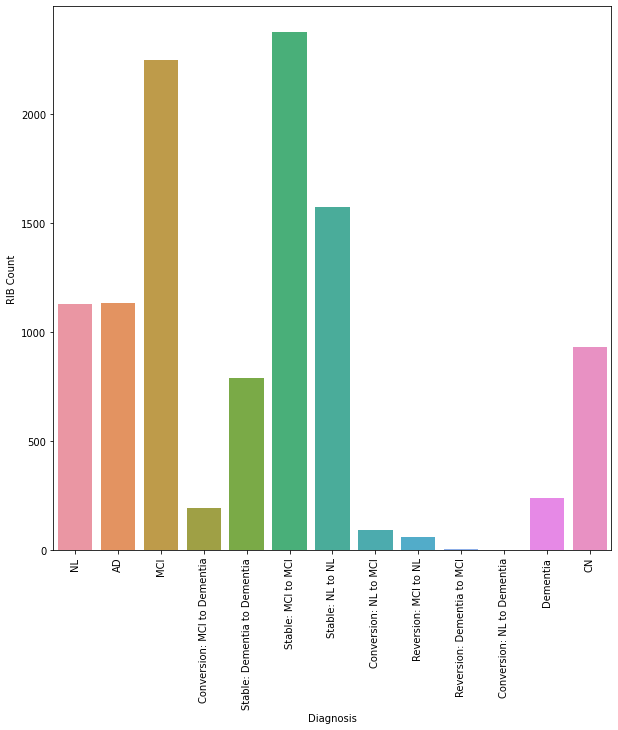

In [ ]:
sns.countplot(x='DIAGNOSIS', data=df_diagnosis)
plt.ylabel('RIB Count') # Gus: Esto es RID? No me queda claro por qué el eje X es RID count si cada RID sería una fila correspondiente al mismo individuo, no un diagnóstico.
plt.xlabel('Diagnosis')
plt.xticks(rotation=90)
plt.show()

# **Calculate patients with conversion to AD month from the baseline visit**

The CONVERSION_MONTH indicates at witch visit month from the baseline visit the patient was first diagnosed with Alzheimer's disease (AD).

In [ ]:
def get_patient_conversion_month(dfg):
  dfg_ad = dfg[dfg['DIAGNOSIS'] == 'AD']

  if len(dfg_ad) > 0:
    return dfg_ad['VISIT_MONTH'].min()

  return np.inf

rib_convertion_month = df_diagnosis.groupby('RID').apply(get_patient_conversion_month)
df_diagnosis['CONVERSION_MONTH'] = df_diagnosis['RID'].apply(lambda x: rib_convertion_month[x])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


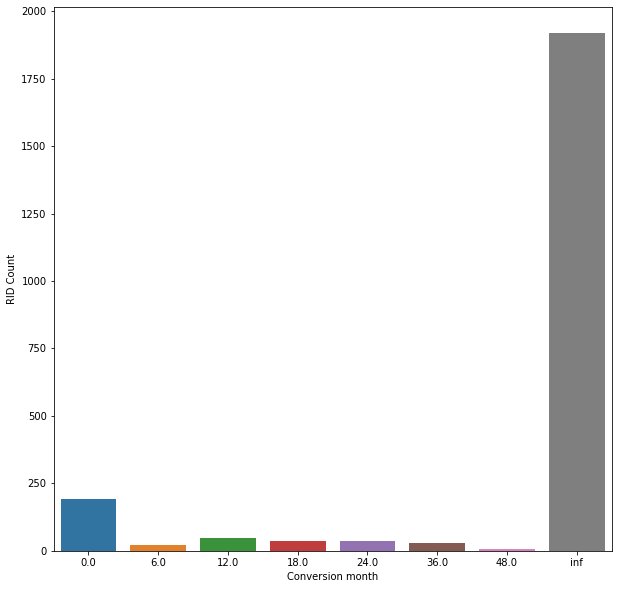

In [ ]:
sns.countplot(rib_convertion_month.values)
plt.ylabel('RID Count')
plt.xlabel('Conversion month')
plt.show()

# **Aca vamos a empezar a usar df_clinical**

## **Clinical data clean up**

* Remove entries with invalid or empty visit code
* Remove patients that don't have a baseline visit


In [ ]:
# Clean entries by VISCODE
df_clinical.dropna(subset=['VISCODE'], inplace=True)
df_clinical = df_clinical[~df_clinical['VISCODE'].isin(['sc', 'uns1', 'f','nv'])] # Estos datos estan tomados del diccionario VISIT.csv que esta en la carpeta compartida

# Clean entries of patients without a baseline visit
RID_WITH_BL = df_clinical.groupby('RID').apply(lambda x: 'bl' in x['VISCODE'].values).index
df_clinical = df_clinical[df_clinical['RID'].isin(RID_WITH_BL)]

print('\n======= Total patients/entries after clean up in df_clinical ========')
print(f'Total patients: {len(set(df_clinical["RID"]))}') # Same as len(df_clinical["RID"].unique())
print(f'Total entries: {len(df_clinical)}')


======= Total patients/entries after clean up in df_clinical ========
Total patients: 1740
Total entries: 12459


In [ ]:
print(df_clinical.shape)
df_clinical.head(5)

(12459, 394)


,RID,VISCODE,ORIGPROT.x,COLPROT,SITEID,USERDATE,USERDATE2,EXAMDATE,COT1LIST,COT2LIST,COT3LIST,COT1SCOR,COT2SCOR,COT3SCOR,COP1COMP,COCOMND,COP2COMP,COCONSTR,COP3COMP,COT4LIST,COT4TOTL,COP4COMP,CONAME,COP5COMP,COIDEA,COP6COMP,COORIEN,COP7COMP,CO8NURSE,CO8MAGAZ,CO8WIZRD,CO8WIZRR,CO8VAN,CO8VANR,CO8LEPRD,CO8LEPRR,CO8SALE,CO8SALER,CO8SEA,CO8SEAR,CO8TRAIN,CO8TRAIR,CO8COIN,CO8COINR,CO8SHIP,CO8SHIPR,CO8INST,CO8INSTR,CO8MAP,CO8MAPR,CO8AXE,CO8AXER,CO8BOARD,CO8BOARR,CO8CARRT,CO8CARRR,CO8MILK,CO8MILKR,CO8VOL,CO8VOLR,CO8FORST,CO8FORSR,CO8ANCHR,CO8ANCRR,CO8GEM,CO8GEMR,CO8CAT,CO8CATR,CO8FUND,CO8FUNDR,CO8EDGE,CO8EDGER,CO8CAKE,CO8CAKER,COP8COMP,COINSTRC,COCOMPRE,COWRDFND,COLANG,CONMCXLA,CONMCXLB,CONMCXLC,COP14CMP,WORDLIST,Q1UNABLE,Q1TR1,Q1TR2,Q1TR3,Q2UNABLE,Q2TASK,Q3UNABLE,Q3TASK1,Q3TASK2,Q3TASK3,Q3TASK4,Q4UNABLE,Q4TASK,Q5UNABLE,Q5TASK,Q6UNABLE,Q6TASK,Q7UNABLE,Q7TASK,Q8UNABLE,Q8WORD1,Q8WORD1R,Q8WORD2,Q8WORD2R,Q8WORD3,Q8WORD3R,Q8WORD4,Q8WORD4R,Q8WORD5,Q8WORD5R,Q8WORD6,Q8WORD6R,Q8WORD7,Q8WORD7R,Q8WORD8,Q8WORD8R,Q8WORD9,Q8WORD9R,Q8WORD10,Q8WORD10R,Q8WORD11,Q8WORD11R,Q8WORD12,Q8WORD12R,Q8WORD13,Q8WORD13R,Q8WORD14,Q8WORD14R,Q8WORD15,Q8WORD15R,Q8WORD16,Q8WORD16R,Q8WORD17,Q8WORD17R,Q8WORD18,Q8WORD18R,Q8WORD19,Q8WORD19R,Q8WORD20,Q8WORD20R,Q8WORD21,Q8WORD21R,Q8WORD22,Q8WORD22R,Q8WORD23,Q8WORD23R,Q8WORD24,Q8WORD24R,Q9TASK,Q10TASK,Q11TASK,Q12TASK,Q13UNABLE,Q13TASKA,Q13TASKB,Q13TASKC,TIMEEND,TIMEBEGAN,Q1SCORE,Q2SCORE,Q3SCORE,Q4SCORE,Q5SCORE,Q6SCORE,Q7SCORE,Q8SCORE,Q9SCORE,Q10SCORE,Q11SCORE,Q12SCORE,TOTSCORE,Q13SCORE,TOTAL13,ORIGPROT.y,RBMID,RECDATE,A1MICRO,A2MACRO,AACT,AAT,ACE,ACTH,ADIPNCTN,AFP,AGRP,ANG2,ANGTNSNG,APOAI,APOAII,APOAIV,APOB,APOCI,APOCIII,APOD,APOE,APOH,AR,AXL,B2M,BDNF,BLC,BMP6,BNP,BTC,C3,CA125,CA199,CALBINDN,CALCITNN,CD40,CD40L,CD5L,CEA,CGA,CKMB,CLU,CNTF,CMPLMNFH,CORTISOL,CPEPTIDE,CRP,CTGF,CYSTATNC,EGF,EGFR,EPTHLDNA,ENRAGE,EOTAXIN1,EOTAXIN3,EPO,EPR,ESELECTN,ET1,FABP,FACTRVII,FAS,FASL,FETUINA,FGF4,FGFBASI,FIBRINGN,FRTN,FSH,G,GH,GLP1TO,GLUCAGON,GRNLCMCS,GROALPH,GSTALP,HAPTGLBN,HBEGFGF,HCC4,HGF,HSP60,I3,ICAM,IFNGAMMA,IGA,IGE,INSLGFBP,IGFI,IGM,IL1ALPHA,IL1BETA,IL10,IL11,IL12P40,IL12P70,IL13,IL15,IL16,IL18,IL1R,IL2,IL25,IL3,IL4,IL5,IL6,IL6R,IL7,IL8,INSULIN,IP,KIM1,LEPTIN,LH,LOX,A,LYMPHTCT,MCP1,MCP2,MCP3,MCP4,MCLNSF1,MLNDMLDL,MDC,MCRPHMIF,MI,MCRPHIP1,MIPRT1B,MCRPHIP3,MMP1,MMP10,MMP2,MMP3,MMP7,MMP9,MM9T,MYLDPIF1,MPO,MYOGLOBN,NTRPHGAL,NGFBETA,NRCAM,OSTEPNTN,PAI1,PAP,P,PLMNRARC,PDGF,PLGF,PPP,PRL,PROGSTRN,PRNSLNIN,PRNSLNTT,PSAF,PYY,RCPTRFRD,RANTES,RESISTIN,S100B,SAP,SCF,SECRETIN,SRMGLTOT,SHBG,SOD1,SORTILIN,TBG,TECK,TSTSTRNT,TF,TFF3,TGFAL,TGFB,THP,THRMBSP1,TSSINHM1,TM,TNC,TNFALPHA,TNFBETA,T,THRMBPTN,TNFRAILR,TRNSFRRN,TSH,TTR,VCAM,VEGF,VITRNCTN,VKDPS,VWF,PTID,PTGENDER,AGE,PTEDUCAT,PTETHCAT,PTRACCAT,DX.bl,APOE4,DXCHANGE,RCT20,RCT19,RCT392,RCT11,RCT8,SPARE_AD,TAU,ABETA142,PTAU181P,ADNI_MEM,ADNI_EF,VSWEIGHT,VSWTUNIT,VSHEIGHT,VSHTUNIT
0,2,bl,ADNI1,ADNI1,107.0,2014-08-25,NaN,2005-09-08,NaN,NaN,NaN,5.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,Yes,NaN,Yes,NaN,Yes,NaN,No,NaN,No,NaN,Yes,NaN,No,NaN,No,NaN,Yes,NaN,No,NaN,No,NaN,No,NaN,No,NaN,No,NaN,No,NaN,No,NaN,No,NaN,No,NaN,No,NaN,No,NaN,Yes,NaN,No,NaN,NaN,None,None: participant understands,None,None: participant speaks clearly and/or is und...,12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.67,0.0,0.0,5.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,10.67,3.0,18.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## **Mergeando las tablas**
Se mergean las tablas por **RID** y **VISCODE** y se analiza la demografía de los diagnosticos.

In [ ]:
#Hago el merge entre las dos tablas
df_merged = pd.merge(
    df_clinical,
    df_diagnosis,
    how='outer',
    on=['RID', 'VISCODE'],
    suffixes=['_clinical', '_diagnosis'],
    indicator=True,
    validate='1:1'
)

El siguiente gráfico muestra:

* Cuantas entradas están solo en df_clinical (**left_only**)
* Cuantas entradas están solo en df_diagnosis (**right_only**)
* Cuantas entradas estan en ambos datasets (**both**)

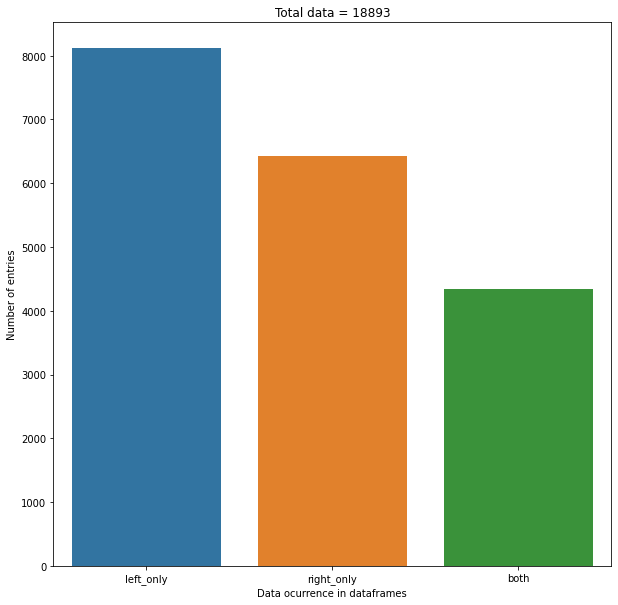

In [ ]:
count_data = df_merged.groupby('_merge').apply(lambda x: len(x))
sns.barplot(x=count_data.index, y=count_data.values)
plt.title(f'Total data = {len(df_merged)}')
plt.ylabel('Number of entries')
plt.xlabel('Data ocurrence in dataframes')
plt.show()

El siguiente chart muestra los grupos Adni 1, GO/2 y 3 que se encuentran representados en el dataset df_clinical.

No me queda claro que son las columnas ORIGPROT.x y COLPROT y porque difieren. Se me ocurre que ORIGPROT.x indica el grupo al que pertenecia originalmente, pero colprot no me dice nada.

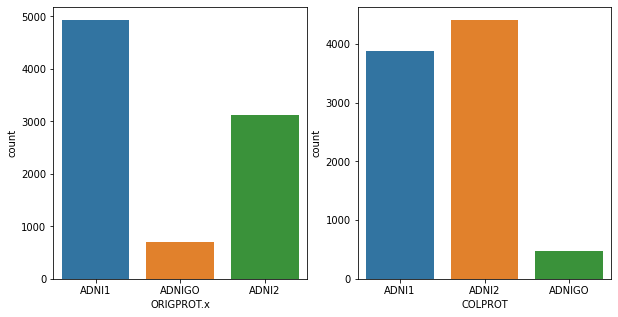

In [ ]:
fig, (ax1, ax2)  = plt.subplots(1,2)
fig.set_size_inches(10,5)
sns.countplot(x='ORIGPROT.x', data=df_clinical, ax=ax1)
sns.countplot(x='COLPROT', data=df_clinical, ax=ax2)
plt.show()

Miro la distribusión de los grupos (Phase) de las entradas que estaban en ambos datasets (df_clinical y df_diagnosis)

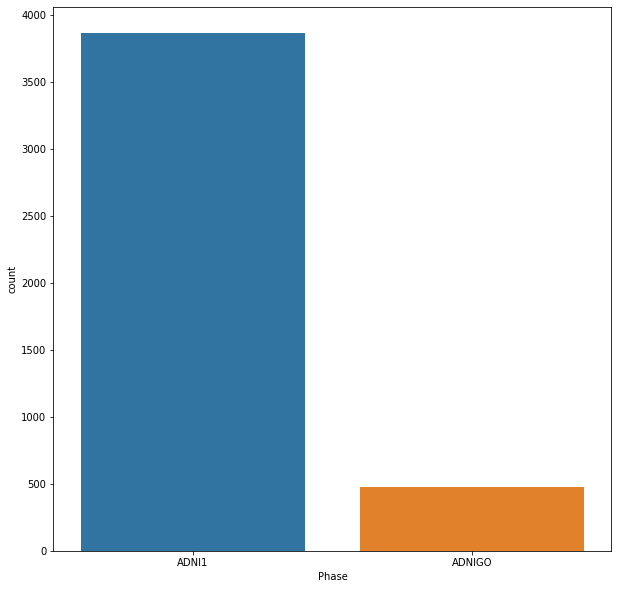

In [ ]:
df_merged_both = df_merged[df_merged['_merge'] == 'both'] #Aca se crea df_merged_both
sns.countplot(x='Phase', data=df_merged_both)
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
df_merged_both

In [ ]:
# Exploro cuantas entradas controles, MCI & AD nos quedamos EN BASELINE.
# Esto luego deberia hacerse con el diagostico CURRENT correcto de la otra tabla

NL = df_merged_both[(df_merged_both['VISIT_MONTH'] == 0) & (df_merged_both['DIAGNOSIS'] == 'NL')]
MCI = df_merged_both[(df_merged_both['VISIT_MONTH'] == 0) & (df_merged_both['DIAGNOSIS'] == 'MCI')]
AD = df_merged_both[(df_merged_both['VISIT_MONTH'] == 0) & (df_merged_both['DIAGNOSIS'] == 'AD')]

In [ ]:
print(NL.shape)
print(MCI.shape) #La mayoria son MCI
print(AD.shape)
sns.countplot(x='DIAGNOSIS', data=df_merged_both)
plt.ylabel('Patients')
plt.xlabel('Diagnosis')
plt.xticks(rotation=90)
plt.show()

La columna **conversion_month** indica en que mes (viscode) el paciente es etiquetado por primera vez como AD

In [ ]:
sns.countplot(x='CONVERSION_MONTH', data=df_merged_both.groupby('RID').first().reset_index())
plt.ylabel('Patients')
plt.xlabel('Visit month')
plt.show()

In [ ]:
# Exploro conversiones usando DXCHANGE
#NL_to_MCI = df_merged[df_merged['DXCHANGE'] == 'Conversion: NL to MCI']
#MCI_to_Dem = df_merged[df_merged['DXCHANGE'] == 'Conversion: MCI to Dementia']
#NL_to_Dem = df_merged[df_merged['DXCHANGE'] == 'Conversion: NL to Dementia']
#MCI_stable = df_merged[df_merged['DXCHANGE'] == 'Stable: MCI']

sns.countplot(x='DXCHANGE_clinical', data=df_merged_both) #Podria ser que no tengamos ninguna conversion en las 1060 entradas?????
plt.ylabel('Patients')
plt.xlabel('Conversion to')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_merged_both['DXCHANGE_clinical'].value_counts()

In [ ]:
df_merged['DIAGNOSIS'].value_counts()

##Demographic analysis

In [ ]:
# df_merged.dropna(subset=['CRP'], inplace = True)

In [ ]:
plt.figure(figsize=(15,6))

sns.countplot(x='PTGENDER', data=df_merged.groupby('RID').first().reset_index(), hue='DIAGNOSIS') # Estos datos son de df_merged y no de los filtrados
plt.ylabel('Cantidad de pacientes')
plt.xlabel('Gender')
plt.show()


## **Datos de sangre**

In [ ]:
# Correr este si queres ver todos las columnas
pd.set_option('display.max_columns', None)

In [ ]:
path_datadic = '/gdrive/My Drive/datos ADNI/DATADIC.csv'

df_dic = pd.read_csv(path_datadic, low_memory=False)

In [ ]:
# Tomo datos de analisis de sangre

# Los nombres completos de los analisis de la tabla de diccionario que acabo de cargar
blood_fullnames = df_dic[df_dic['TBLNAME'] == 'RBMQC']['TEXT'][5:]

# Los nombres abreviados de los analisis que aparecian en df_clinical (el indice de columnas esta elegido "a ojo")
blood_short_names = list(df_clinical.columns[180:370])

# Creo un diccionario donde las claves son los nombres abreviados y los valores los nombres completos de los analisis de sangre
blood_dict = pd.DataFrame(zip(blood_short_names, blood_fullnames), columns=['blood_short_name','blood_fullnames'])

pd.set_option('display.max_rows', None)
display(blood_dict.head(len(blood_dict)))

In [ ]:
blood_dict['Es estandar'] = None
blood_dict['Dificultad (1 a 10)'] = None
blood_dict['Costo monetario (1 a 10)'] = None
blood_dict.to_excel('/gdrive/My Drive/datos ADNI/blood_dict.xlsx', index=False)

## **Clean up de las features**

Según lo que discutimos en el último call para seleccionar los features primero eliminamos todas las columnas que no tengan ningún dato (o sea, cuyas filas son todo NaN) y luego para las columnas restantes eliminamos las filas.

Para esto por simplicidad hago:
1. Me quedo con la cantidad de filas necesarias (features + target)
2. Elimino columnas con todo NaNs
3. Elimino filas con algún NaN. Esto ya no considera las columans que son todos NaNs porque ya no están en el DF

In [ ]:
TARGET_COLS = ['RID', 'DIAGNOSIS', 'CONVERSION_MONTH']

# Esto tambien elimina filas que tienen NaNs en el target.
df_merged_both = df_merged_both.loc[:, TARGET_COLS + blood_short_names].copy()
df_merged_both.dropna(axis=1, how='all', inplace=True) # Elimino columnas donde son todos NaNs
df_merged_both.dropna(axis=0, how='any', inplace=True) # Elimino filas donde hay algún NaN

In [ ]:
df_merged_both.head(10)

## **Plots demográficos de la cantidad de datos tras la limpieza**



In [ ]:
sns.countplot(x='DIAGNOSIS', data=df_merged_both)
plt.ylabel('Visits')
plt.xlabel('Diagnosis')
plt.show()

In [ ]:
sns.countplot(x='CONVERSION_MONTH', data=df_merged_both.groupby('RID').first().reset_index())
plt.ylabel('Cantidad de pacientes')
plt.xlabel('Visit month')
plt.show()

In [ ]:
print('Cantidad de pacientes con 1 o 2 visitas')
df_merged_both.groupby('RID').apply(lambda x: len(x)).value_counts()

In [ ]:
sns.countplot(df_merged_both.groupby('RID').apply(lambda x: '-'.join(np.unique(x['DIAGNOSIS'].values))))
plt.xlabel('Diagnosticos del paciente')
plt.ylabel('Cantidad de pacientes')
plt.show()

In [ ]:
# Distribucion de la concentracion de moleculas en plasma. Hay mucha variabilidad.
plt.rcParams['figure.figsize']=(10,10)
ax = sns.boxplot(data=df_merged_both.iloc[:,3:14], palette="Set2") #Solo laas primeras 10 features
plt.xticks(rotation=45)
plt.show()

### Mas plots demograficos: Género, edad y etnia.
**Estos datos no están en df_merged_both entonces tengo que recuperar el RID de df_merged**

In [ ]:
# Busco con que sujetos nos quedamos en both en base a su RID
RID_en_both = list(df_merged_both['RID'].unique())

# Selecciono genero, edad y raza en base a ese RID en df_merged
# df_merged['RID' == RID_en_both]
subset_df_both = df_merged[df_merged['RID'].isin(RID_en_both)]

cant_suj = len(subset_df_both.groupby('RID').first().reset_index())

In [ ]:
subset_df_both.groupby('RID').first().reset_index()['DIAGNOSIS'].value_counts()

MCI    379
AD     110
NL      55
Name: DIAGNOSIS, dtype: int64

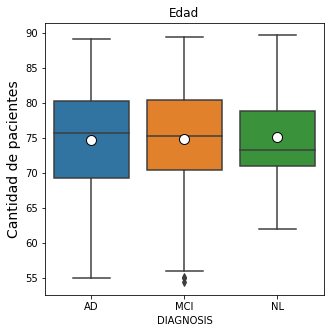

In [ ]:
plt.rcParams['figure.figsize']=(5,5)
sns.boxplot(y= 'AGE', x='DIAGNOSIS', data = subset_df_both.groupby('RID').first().reset_index(),showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title(f'Edad', fontsize=12)
plt.ylabel('Cantidad de pacientes', fontsize=14)
#plt.xlabel('Edad', fontsize=10)
plt.savefig('edad')
plt.legend('upper letf')
plt.show()


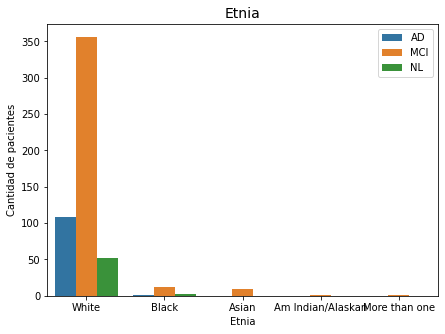

In [ ]:
plt.rcParams['figure.figsize']=(7,5)
sns.countplot(x='PTRACCAT', data=subset_df_both.groupby('RID').first().reset_index(), hue='DIAGNOSIS') # Estos datos son de df_merged y no de los filtrados
plt.title(f'Etnia', fontsize=14)
plt.xticks(fontsize= 10)
plt.ylabel('Cantidad de pacientes', fontsize=10)
plt.xlabel('Etnia', fontsize=10)
#plt.savefig('etnia')
plt.legend(loc ='upper right')
plt.show()


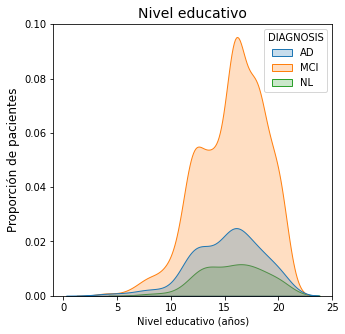

In [ ]:

# sns.countplot(x='PTEDUCAT', data=subset_df_both.groupby('RID').first().reset_index(), hue='DIAGNOSIS') # Estos datos son de df_merged y no de los filtrados
plt.rcParams['figure.figsize']=(5,5)
sns.kdeplot(x='PTEDUCAT', data= subset_df_both.groupby('RID').first().reset_index(), hue='DIAGNOSIS', fill=True)
plt.title(f'Nivel educativo', fontsize=14)
plt.ylabel('Proporción de pacientes', fontsize=12)
plt.xlabel('Nivel educativo (años)', fontsize=10)
plt.savefig('educacion_kde')
plt.show()


## **Procesamos el dataframe para ser consumido por el modelo**

In [ ]:
col         = 'DIAGNOSIS'
conditions  = [df_merged_both[col].str.contains("NL"), df_merged_both[col].str.contains("MCI"), df_merged_both[col].str.contains("AD")]
choices     = [0, 1, 2]

set(df_merged_both.DIAGNOSIS)
df_merged_both["DIAGNOSIS_code"] = np.select(conditions, choices, default=np.nan)

display(df_merged_both[["DIAGNOSIS_code", "DIAGNOSIS"]].sample(20))

,DIAGNOSIS_code,DIAGNOSIS
4565,1.0,MCI
4143,1.0,MCI
6303,1.0,MCI
1120,1.0,MCI
5074,0.0,NL
873,2.0,AD
1195,1.0,MCI
5580,1.0,MCI
5954,2.0,AD
2587,1.0,MCI


In [ ]:
TARGET_COLS = TARGET_COLS + ["DIAGNOSIS_code"]
FEATURE_COLS = [c for c in df_merged_both.columns if c not in TARGET_COLS]

#scaler = MinMaxScaler() # escaleo por separado ambos sets
#df_merged_both[FEATURE_COLS] = scaler.fit_transform(df_merged_both[FEATURE_COLS].values)

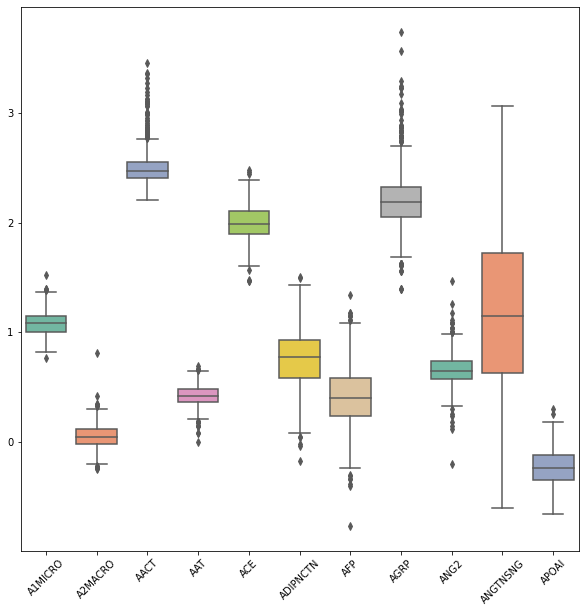

In [ ]:
# Distribucion de la concentracion de moleculas en plasma. Hay mucha variabilidad.
plt.rcParams['figure.figsize']=(10,10)
ax = sns.boxplot(data=df_merged_both.iloc[:,3:14], palette="Set2") #Solo laas primeras 10 features
plt.xticks(rotation=45)
plt.show()

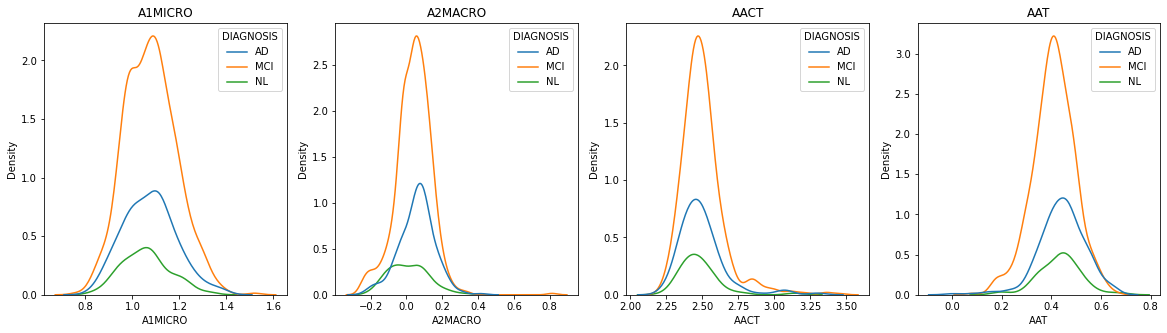

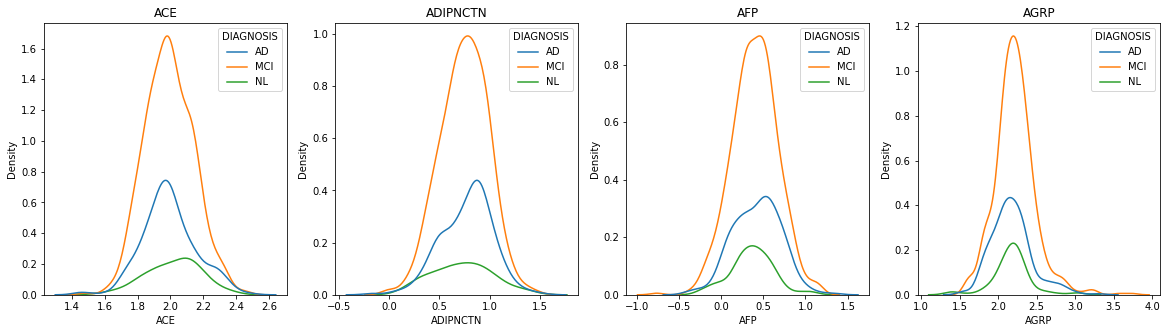

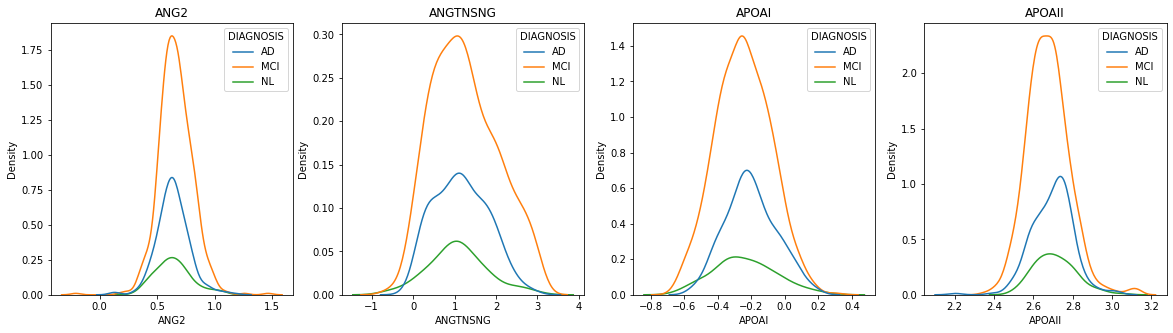

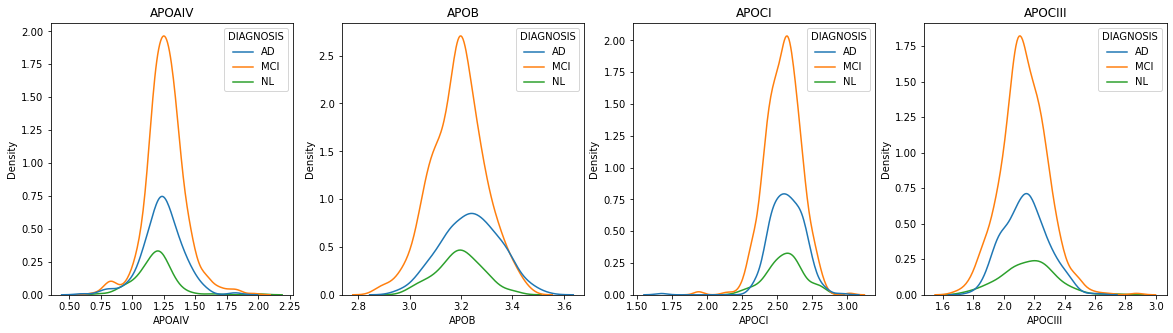

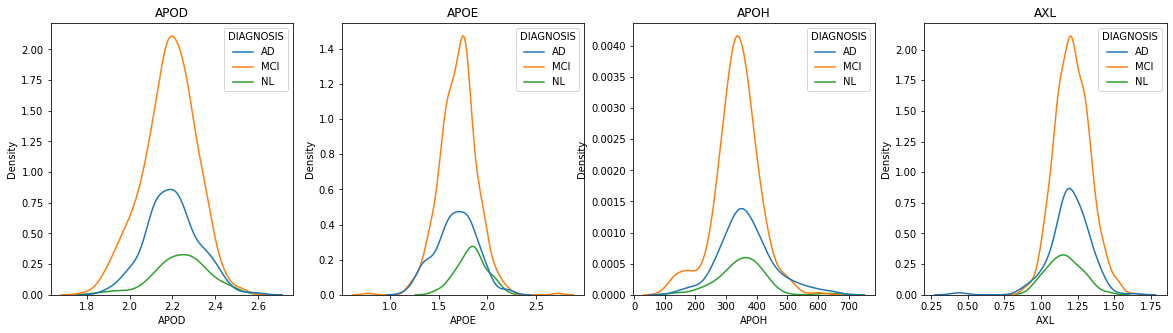

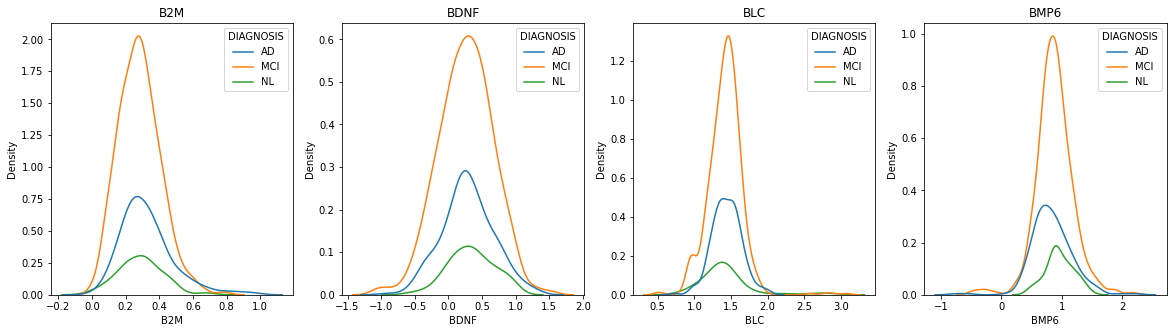

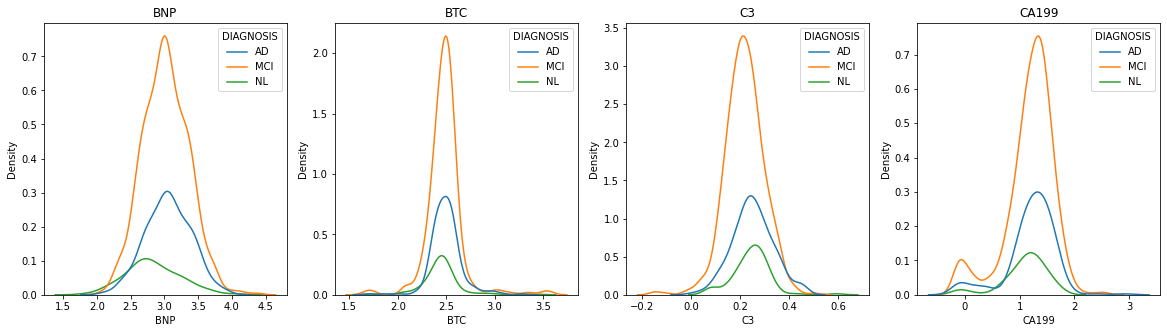

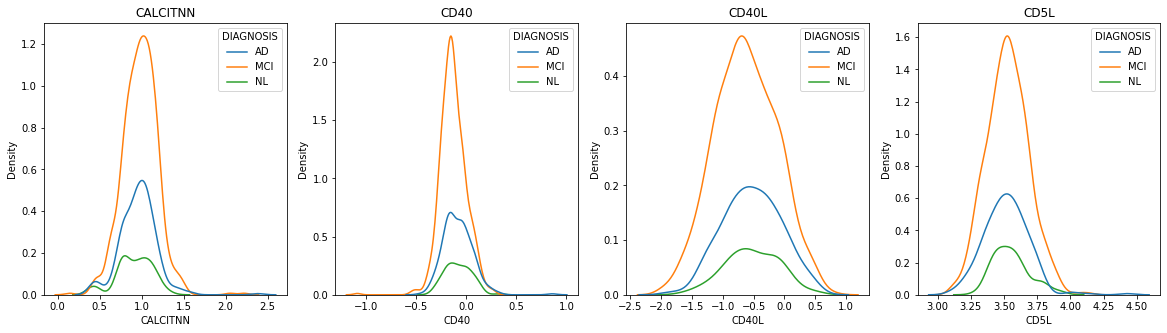

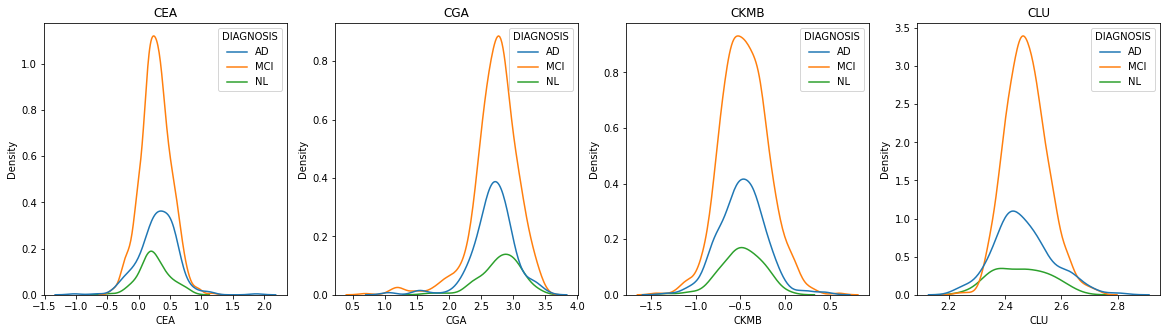

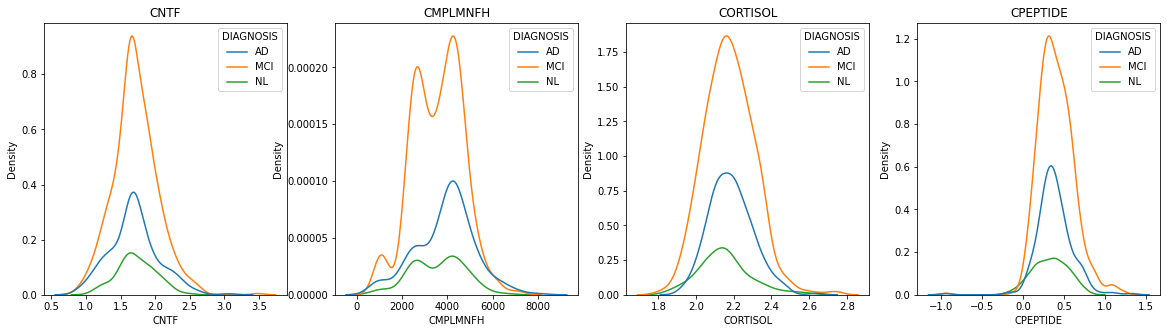

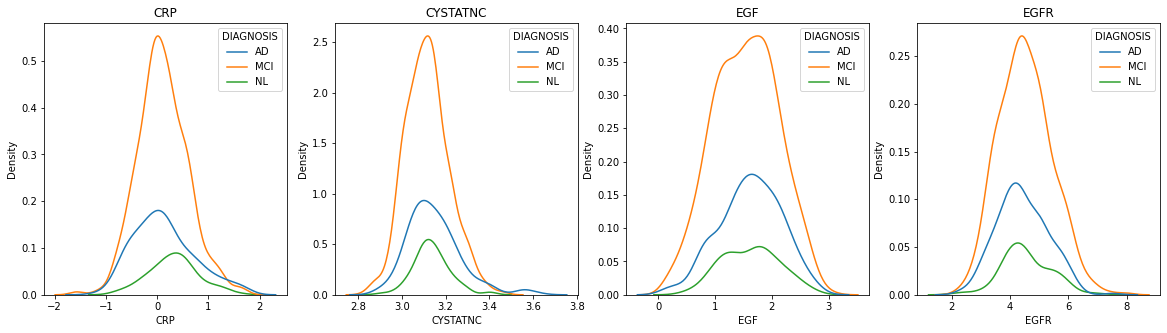

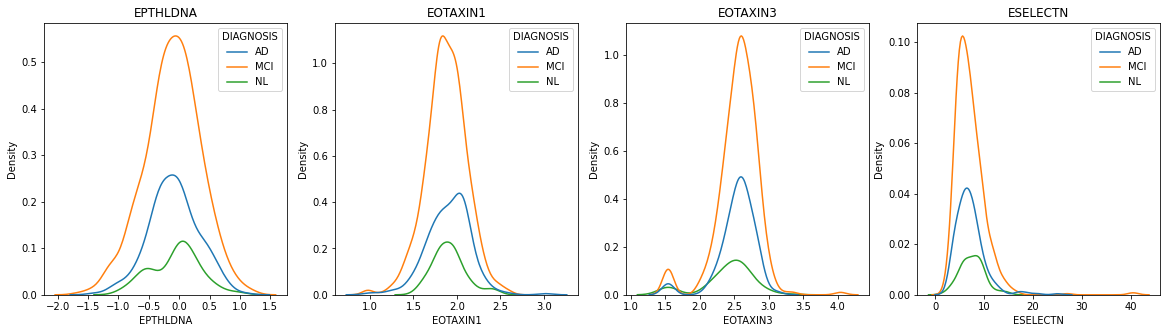

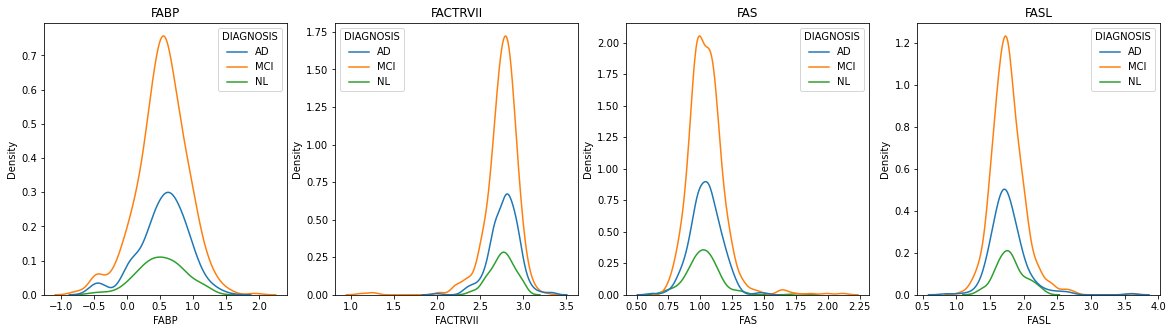

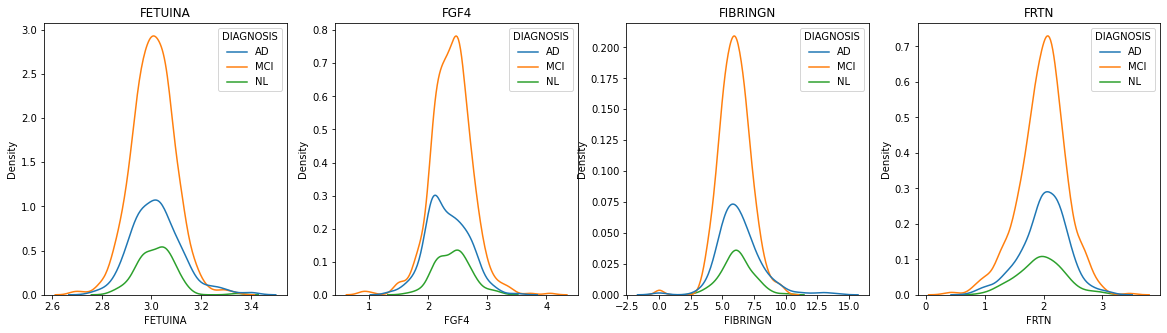

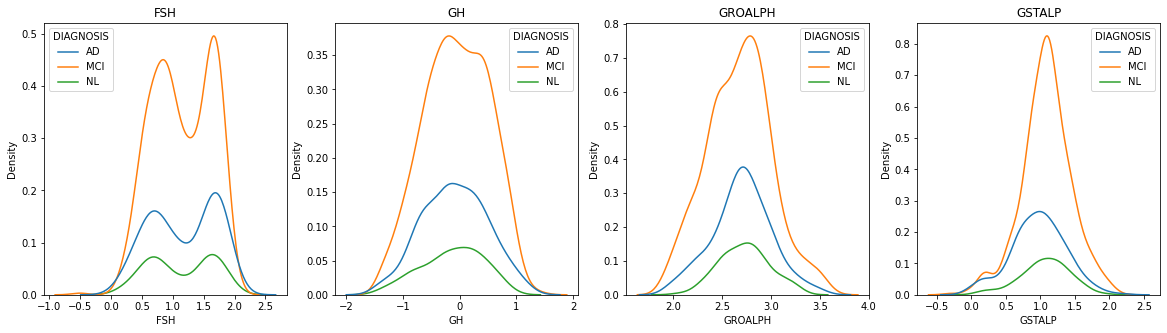

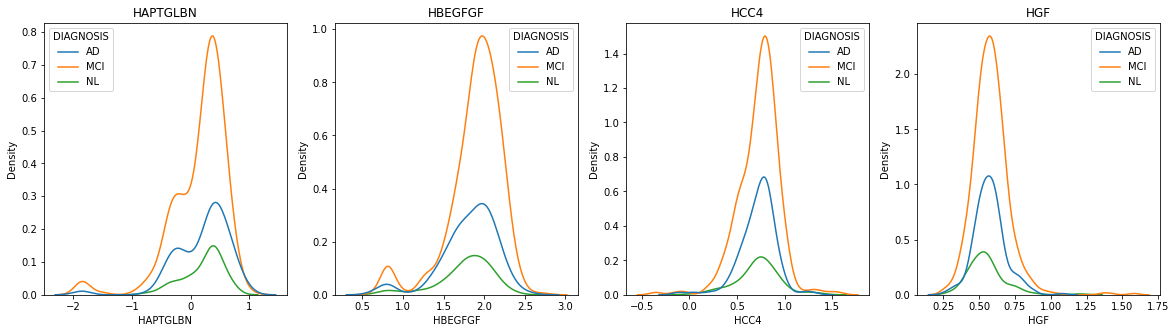

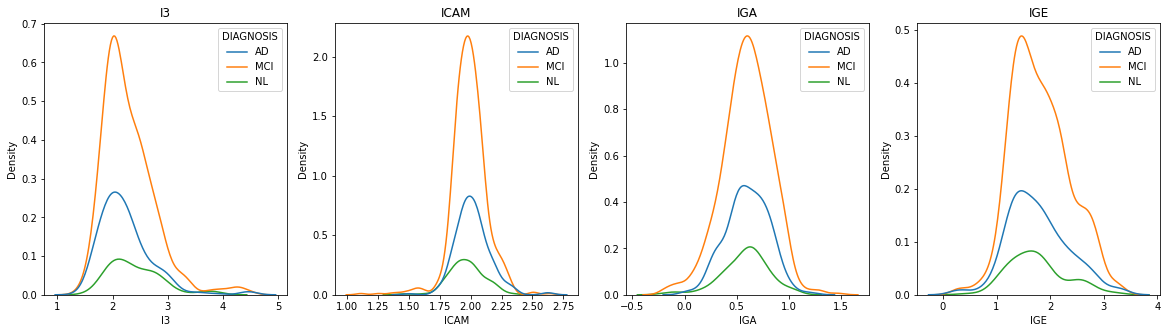

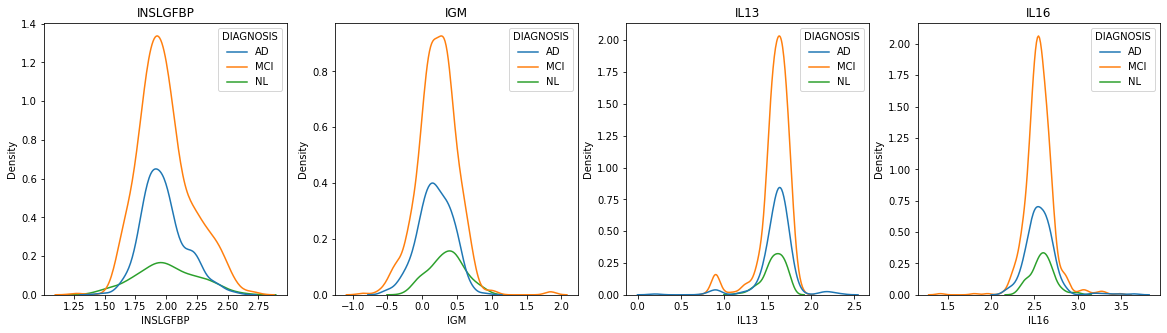

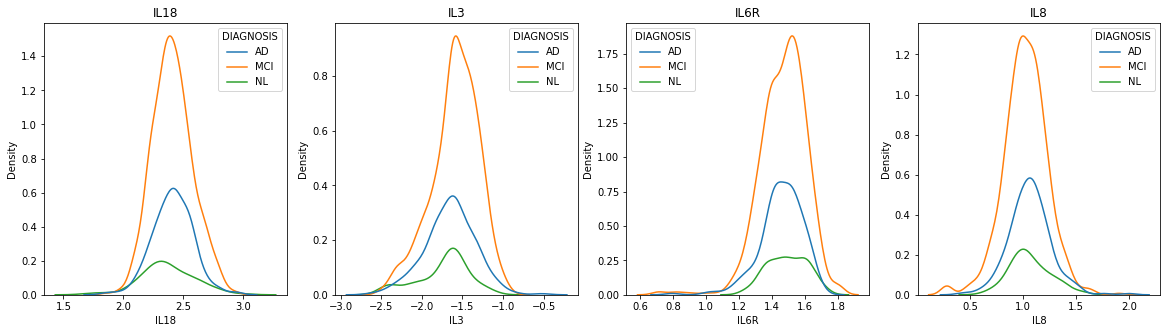

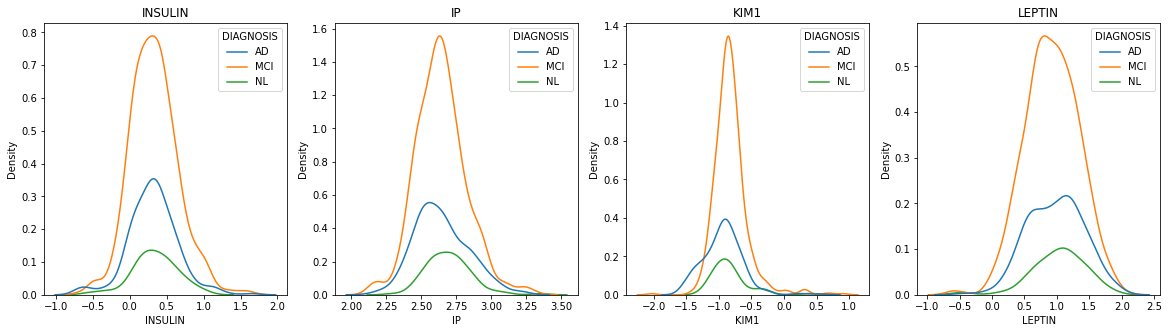

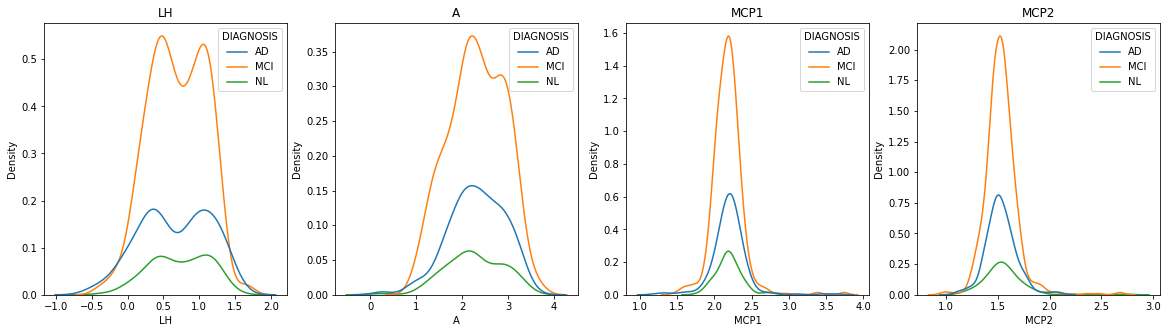

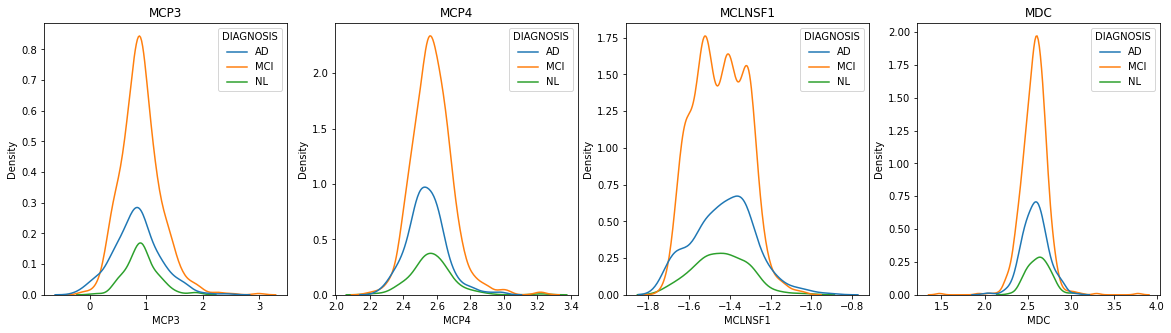

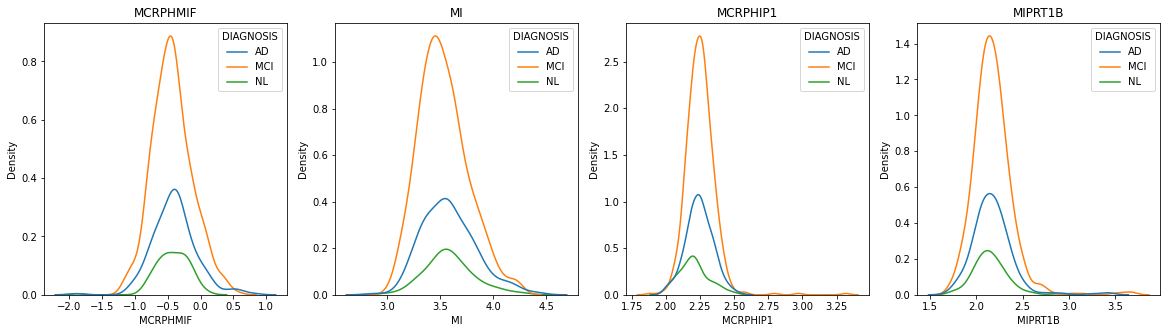

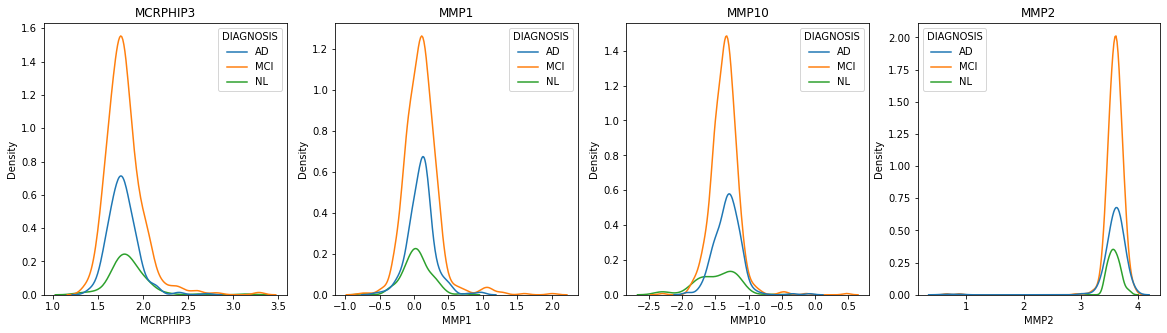

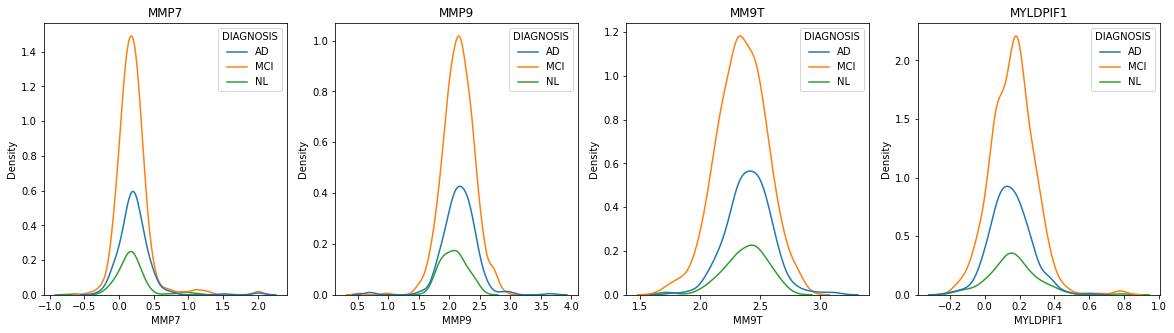

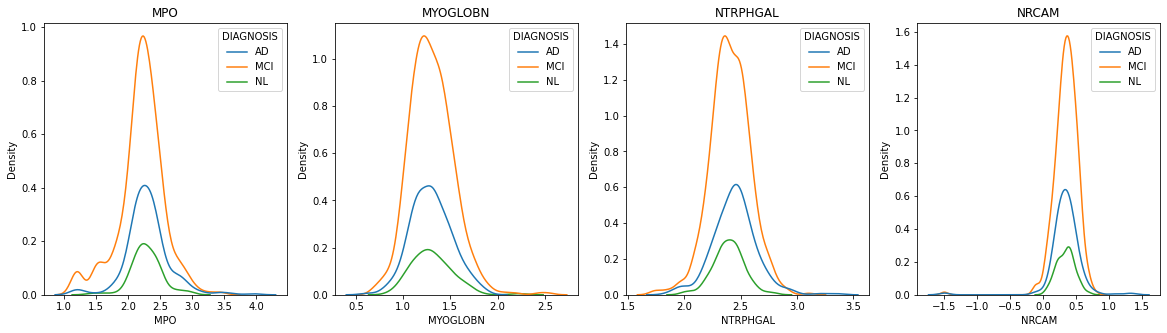

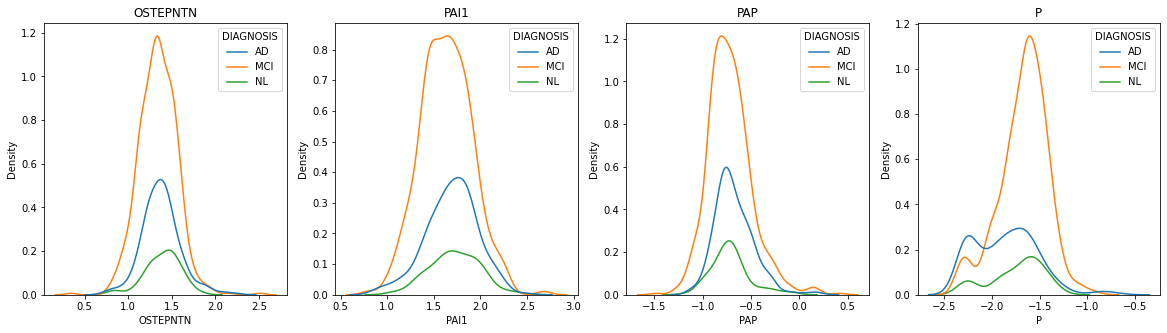

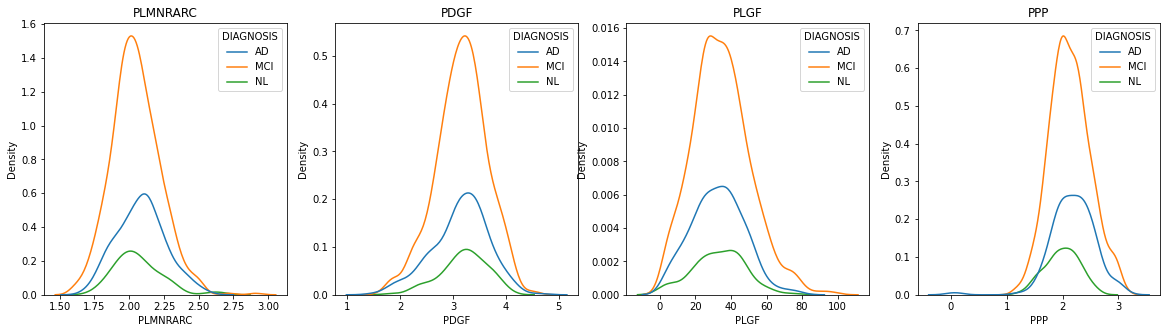

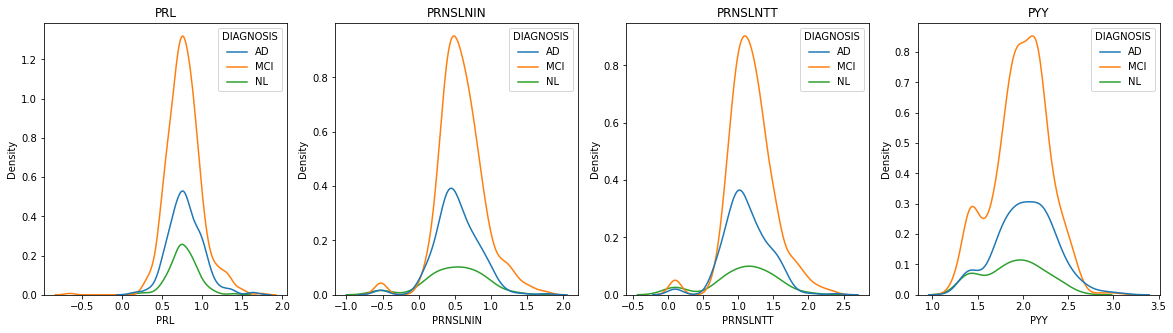

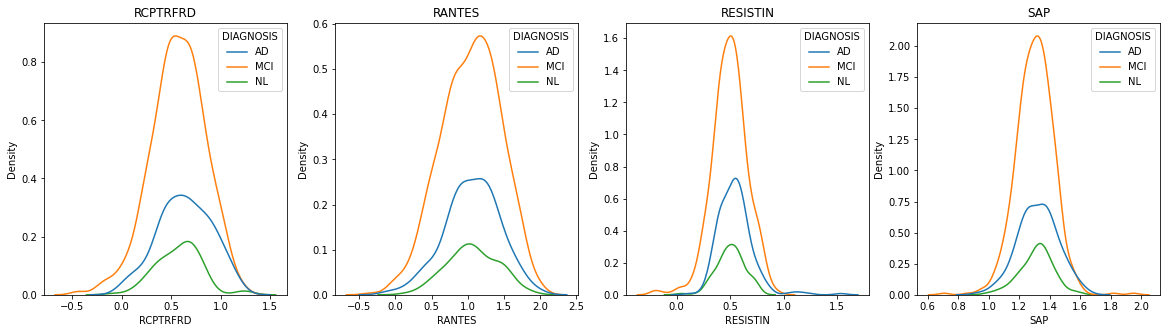

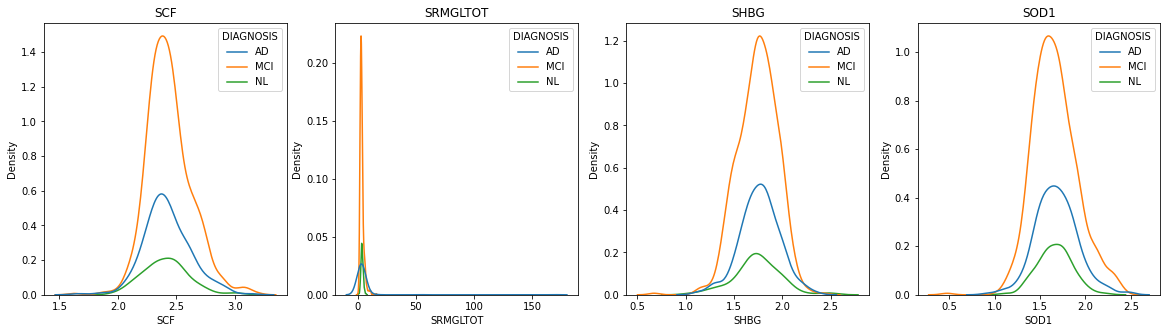

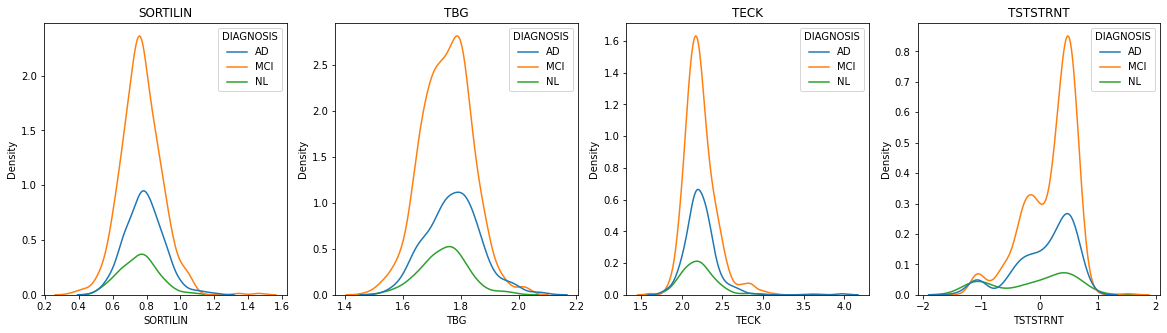

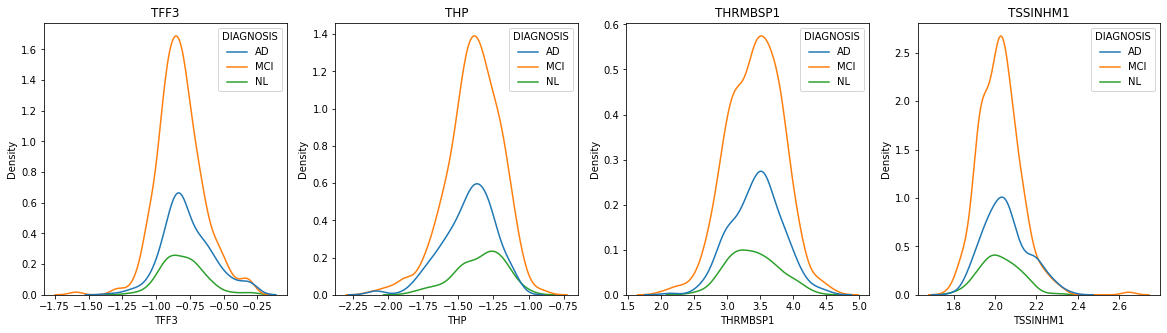

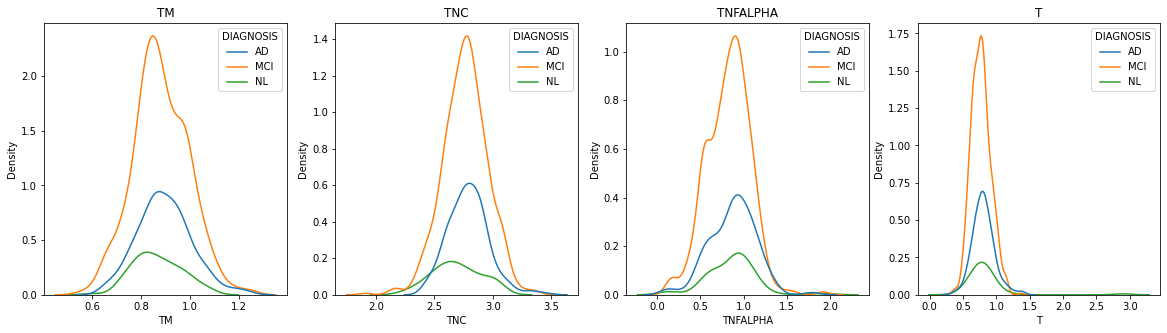

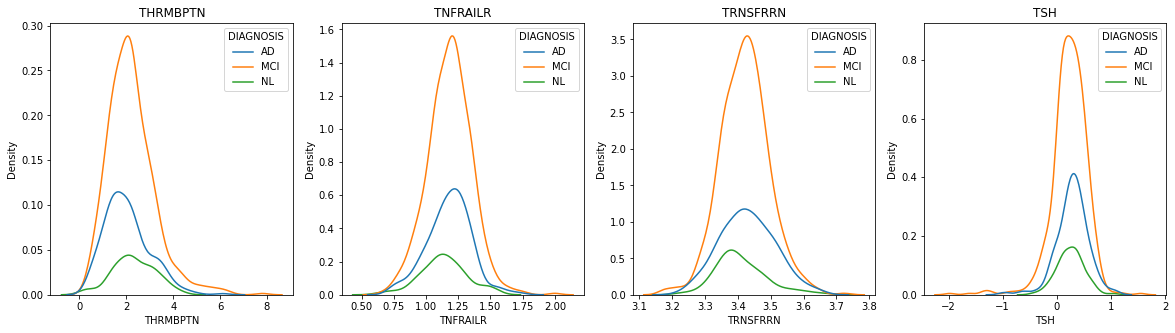

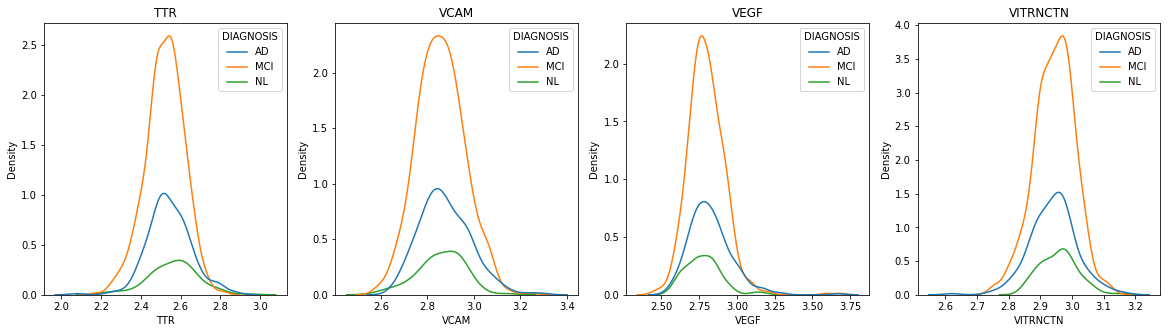

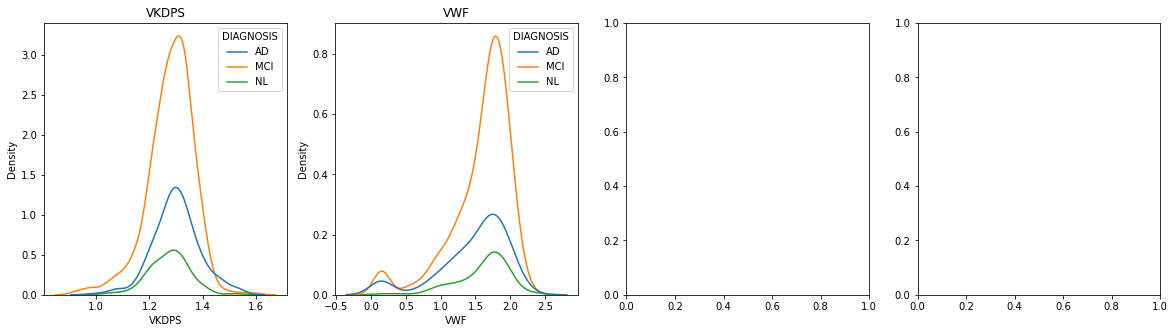

In [ ]:

for i in range(0, len(FEATURE_COLS), 4):
  fig, axes = plt.subplots(1,4)
  fig.set_size_inches(20, 5)
  for ax, col in zip(axes, FEATURE_COLS[i:i+4]):
    sns.kdeplot(x=col, data=df_merged_both, hue='DIAGNOSIS', ax=ax)
    ax.set_title(col)
  plt.show()

### **Guarda los datos procesados**
### Lo dejo comentado

In [ ]:
## Lo dejo comentado para no pisarlo cada vez que miremos algo aca

df_merged_both.to_csv('/gdrive/My Drive/datos ADNI/preprocessed_data_gus.csv', index=False)

### **Buscando diferencias en los csv que se guardaron**

In [ ]:
df_lao = pd.read_csv('/gdrive/My Drive/datos ADNI/preprocessed_data_version_lao.csv')
df_jessi = pd.read_csv('/gdrive/My Drive/datos ADNI/preprocessed_data_version_jessi.csv')

In [ ]:
# Los comparo
df_lao == df_jessi

In [ ]:
df_lao.head()

,RID,DIAGNOSIS,CONVERSION_MONTH,A1MICRO,A2MACRO,AACT,AAT,ACE,ADIPNCTN,AFP,AGRP,ANG2,ANGTNSNG,APOAI,APOAII,APOAIV,APOB,APOCI,APOCIII,APOD,APOE,APOH,AXL,B2M,BDNF,BLC,BMP6,BNP,BTC,C3,CA199,CALCITNN,CD40,CD40L,CD5L,CEA,CGA,CKMB,CLU,CNTF,CMPLMNFH,CORTISOL,CPEPTIDE,CRP,CYSTATNC,EGF,EGFR,EPTHLDNA,EOTAXIN1,EOTAXIN3,ESELECTN,FABP,FACTRVII,FAS,FASL,FETUINA,FGF4,FIBRINGN,FRTN,FSH,GH,GROALPH,GSTALP,HAPTGLBN,HBEGFGF,HCC4,HGF,I3,ICAM,IGA,IGE,INSLGFBP,IGM,IL13,IL16,IL18,IL3,IL6R,IL8,INSULIN,IP,KIM1,LEPTIN,LH,A,MCP1,MCP2,MCP3,MCP4,MCLNSF1,MDC,MCRPHMIF,MI,MCRPHIP1,MIPRT1B,MCRPHIP3,MMP1,MMP10,MMP2,MMP7,MMP9,MM9T,MYLDPIF1,MPO,MYOGLOBN,NTRPHGAL,NRCAM,OSTEPNTN,PAI1,PAP,P,PLMNRARC,PDGF,PLGF,PPP,PRL,PRNSLNIN,PRNSLNTT,PYY,RCPTRFRD,RANTES,RESISTIN,SAP,SCF,SRMGLTOT,SHBG,SOD1,SORTILIN,TBG,TECK,TSTSTRNT,TFF3,THP,THRMBSP1,TSSINHM1,TM,TNC,TNFALPHA,T,THRMBPTN,TNFRAILR,TRNSFRRN,TSH,TTR,VCAM,VEGF,VITRNCTN,VKDPS,VWF,DIAGNOSIS_code
0,3,AD,0.0,0.546512,0.310870,0.104204,0.647870,0.534059,0.660141,0.496361,0.296607,0.572332,0.294636,0.439188,0.633625,0.543421,0.626460,0.586907,0.417352,0.605850,0.412433,0.851327,0.754957,0.543284,0.473114,0.454645,0.549620,0.500635,0.388736,0.611199,0.562171,0.279859,0.600711,0.250192,0.410023,0.501715,0.836776,0.608614,0.306651,0.286119,0.429879,0.348833,0.735603,0.401508,0.580302,0.058050,0.379310,0.451148,0.532146,0.454281,0.129442,0.563079,0.827976,0.370035,0.351038,0.357670,0.378047,0.371114,0.534004,0.587362,0.542980,0.500209,0.503191,0.459713,0.699668,0.548685,0.307653,0.242833,0.594704,0.597122,0.708476,0.465544,0.419649,0.674368,0.488525,0.597474,0.458870,0.795522,0.375988,0.548440,0.428618,0.543138,0.427133,0.616082,1.68124,0.379993,0.343802,0.197926,0.343653,0.455630,0.510994,0.534411,0.527732,0.207459,0.285767,0.239345,0.236143,0.321109,0.893813,0.362878,0.543269,0.484534,0.459685,0.447946,0.441063,0.572920,0.649104,0.460378,0.359140,0.361521,0.546457,0.219751,0.486566,0.217997,0.792173,0.825625,0.664448,0.670325,0.685894,0.838167,0.540583,0.478198,0.421059,0.515679,0.011152,0.568733,0.652417,0.130302,0.572197,0.340970,0.508333,0.694135,0.479026,0.600090,0.408830,0.846541,0.554015,0.496406,0.268132,0.133333,0.515256,0.434021,0.719613,0.708535,0.575974,0.424166,0.623971,0.455899,0.450580,2.0
1,3,AD,0.0,0.618504,0.343518,0.172573,0.601232,0.521159,0.617749,0.552797,0.220007,0.594571,0.448692,0.469398,0.577256,0.500000,0.557072,0.501227,0.323661,0.386168,0.290313,0.635398,0.721265,0.516008,0.387941,0.443483,0.461967,0.539778,0.398371,0.481286,0.580707,0.401054,0.600711,0.267254,0.412990,0.512429,0.799671,0.583328,0.203267,0.102248,0.463171,0.429457,0.538598,0.454052,0.591208,0.159627,0.413793,0.477042,0.462557,0.398805,0.104061,0.636303,0.774723,0.305170,0.300899,0.361825,0.378047,0.406846,0.543018,0.601682,0.788511,0.476256,0.334828,0.588938,0.730904,0.535235,0.218043,0.145797,0.627931,0.605414,0.757004,0.485948,0.391998,0.687791,0.527856,0.627788,0.485347,0.795522,0.466209,0.186776,0.443341,0.399836,0.412249,0.616082,1.72428,0.368159,0.315537,0.192793,0.242424,0.430394,0.555677,0.455166,0.572204,0.305681,0.304905,0.228168,0.129802,0.299663,0.884401,0.328207,0.548955,0.513417,0.546234,0.486552,0.456097,0.590690,0.642329,0.431065,0.298618,0.444628,0.337913,0.244276,0.391517,0.260846,0.778997,0.636717,0.483888,0.412030,0.617009,0.884136,0.479942,0.506586,0.421059,0.568765,0.014118,0.568733,0.478515,0.255953,0.561118,0.240163,0.628636,0.806453,0.502183,0.520443,0.405230,0.752404,0.612552,0.441881,0.239368,0.146667,0.515256,0.424763,0.640828,0.631037,0.549285,0.339343,0.536807,0.492240,0.756948,2.0
2,4,MCI,inf,0.766793,0.165386,0.250320,0.624978,0.778983,0.575506,0.703395,0.423492,0.602960,0.459009,0.292955,0.572095,0.467266,0.509146,0.698056,0.481676,0.512276,0.678493,0.707965,0.738514,0.439266,0.395696,0.378680,0.676684,0.591662,0.478865,0.611199,0.520905,0.517366,0.521228,0.497003,0.421016,0.581582,0.850275,0.434514,0.499120,0.515122,0.357747,0.126195,0.676695,0.549974,0.580302,0.338547,0.310345,0.493920,0.664673,0.54398

In [ ]:
df_jessi.head()

,RID,DIAGNOSIS,CONVERSION_MONTH,A1MICRO,A2MACRO,AACT,AAT,ACE,ADIPNCTN,AFP,AGRP,ANG2,ANGTNSNG,APOAI,APOAII,APOAIV,APOB,APOCI,APOCIII,APOD,APOE,APOH,AXL,B2M,BDNF,BLC,BMP6,BNP,BTC,C3,CA199,CALCITNN,CD40,CD40L,CD5L,CEA,CGA,CKMB,CLU,CNTF,CMPLMNFH,CORTISOL,CPEPTIDE,CRP,CYSTATNC,EGF,EGFR,EPTHLDNA,EOTAXIN1,EOTAXIN3,ESELECTN,FABP,FACTRVII,FAS,FASL,FETUINA,FGF4,FIBRINGN,FRTN,FSH,GH,GROALPH,GSTALP,HAPTGLBN,HBEGFGF,HCC4,HGF,I3,ICAM,IGA,IGE,INSLGFBP,IGM,IL13,IL16,IL18,IL3,IL6R,IL8,INSULIN,IP,KIM1,LEPTIN,LH,A,MCP1,MCP2,MCP3,MCP4,MCLNSF1,MDC,MCRPHMIF,MI,MCRPHIP1,MIPRT1B,MCRPHIP3,MMP1,MMP10,MMP2,MMP7,MMP9,MM9T,MYLDPIF1,MPO,MYOGLOBN,NTRPHGAL,NRCAM,OSTEPNTN,PAI1,PAP,P,PLMNRARC,PDGF,PLGF,PPP,PRL,PRNSLNIN,PRNSLNTT,PYY,RCPTRFRD,RANTES,RESISTIN,SAP,SCF,SRMGLTOT,SHBG,SOD1,SORTILIN,TBG,TECK,TSTSTRNT,TFF3,THP,THRMBSP1,TSSINHM1,TM,TNC,TNFALPHA,T,THRMBPTN,TNFRAILR,TRNSFRRN,TSH,TTR,VCAM,VEGF,VITRNCTN,VKDPS,VWF,DIAGNOSIS_code
0,3,AD,0.0,1.17609,0.07918,2.33445,0.44716,2.00432,0.93450,0.27875,2.09342,0.74819,0.47712,-0.23657,2.79099,1.36173,3.27875,2.46389,2.17319,2.27416,1.57978,574.0,1.34242,0.51851,0.14613,1.67210,0.87506,3.11394,2.39794,0.30103,1.54407,0.77085,0.07918,-1.27572,3.64345,0.43136,3.04139,-0.20066,2.40824,1.62325,3880.0,2.13033,0.72428,-0.25964,3.29447,0.34242,4.4,-0.36653,2.06070,2.68034,6.7,0.75587,2.95809,1.17609,1.81954,2.94052,2.09342,5.2,2.02531,1.04139,0.11394,2.76418,0.93952,-0.52288,2.11059,0.70757,0.66276,2.13354,2.02119,0.79239,2.42325,1.93952,0.27875,1.64345,2.50651,2.48144,-1.65758,1.57978,0.92428,0.59106,2.65321,-0.43180,0.53148,0.85126,1.68124,2.17319,1.56820,0.43136,2.54777,-1.35655,2.65514,-0.44370,3.69810,2.17898,2.27184,1.77815,-0.11351,-1.40894,3.58995,0.32222,2.22531,2.36736,0.25527,2.43775,1.46240,2.65706,0.36173,1.34242,1.47712,-0.79588,-1.44370,1.89763,3.02531,25.0,2.50106,1.32222,0.99123,1.63347,2.50379,1.00000,0.91908,0.61278,1.23045,2.43136,2.3,1.70757,1.77815,0.50515,1.81954,2.41664,0.07918,-0.69897,-1.53760,3.57864,2.13033,1.14613,2.76938,1.04139,1.04139,1.3,1.34242,3.41330,0.55630,2.68305,2.98722,2.97035,2.96379,1.23045,1.14613,2.0
1,3,AD,0.0,1.23045,0.11394,2.41996,0.41497,1.99123,0.86332,0.39794,1.91381,0.78533,1.04139,-0.20761,2.73878,1.30103,3.23300,2.34830,2.06070,2.09691,1.34242,452.0,1.30103,0.49136,-0.07572,1.64345,0.61278,3.21219,2.41664,0.20412,1.60206,1.04139,0.07918,-1.22915,3.64738,0.46240,2.93752,-0.25181,2.34830,1.14613,4120.0,2.20683,0.27875,-0.08619,3.30320,0.63347,4.6,-0.29243,1.91908,2.54158,5.7,0.95424,2.83948,1.07918,1.68124,2.94349,2.09342,5.7,2.05308,1.07918,0.81291,2.72346,0.51851,-0.14874,2.17609,0.68124,0.54407,1.83251,2.07188,0.80618,2.56937,1.96848,0.20412,1.67210,2.59439,2.52114,-1.60206,1.57978,1.07918,-0.25964,2.67117,-0.85387,0.49136,0.85126,1.72428,2.14301,1.51851,0.41497,2.44248,-1.37675,2.75815,-0.65758,3.76790,2.32015,2.30963,1.75587,-0.40894,-1.46852,3.55871,0.23045,2.24304,2.40993,0.34242,2.54407,1.49136,2.68574,0.34242,1.27875,1.36173,-0.63827,-1.79588,1.92942,2.72835,29.0,2.45939,0.86923,0.57978,1.04139,2.37840,1.07918,0.77815,0.66276,1.23045,2.51455,2.8,1.70757,1.43136,0.64345,1.81291,2.17898,0.43136,-0.55284,-1.50864,3.36736,2.12710,1.07918,2.86034,0.93952,0.96848,1.4,1.34242,3.40824,0.27875,2.61700,2.96802,2.86510,2.91593,1.25527,1.82607,2.0
2,4,MCI,inf,1.34242,-0.07572,2.51720,0.43136,2.25285,0.79239,0.71600,2.39094,0.79934,1.07918,-0.37675,2.73400,1.25527,3.20140,2.61384,2.25042,2.19866,2.09691,493.0,1.32222,0.41497,-0.05552,1.47712,1.25527,3.34242,2.57287,0.30103,1.41497,1.30103,-0.07572,-0.60206,3.65801,0.66276,3.07918,-0.55284,2.51983,2.21748,3360.0,1.91908,0.59106,0.23045,3.29447,1.14613,4.0,-0.24413,2.33041,2.90472,12.0,0.69897,3.02531,1.14613,1.75587,2.88195,2.77525,9.0,2.22272,0.50515,-0.88606,2.42160,1.59106,0.70757,2.21484,1.04139,0.69020,3.12057,2.01284,0.71600,2.18184,2.39794,0.60206,1.59106,2.72673,2.64738,-1.95861,1.51851,0.95904,0.23045,2.51720,-0.44370,1.04139,0.46240,3.12385,1.92942,1.53148,1.43136,2.72835,-1.28400,2.72428,-0.49485,3.31387,2.33244,2.0

In [ ]:
pd.set_option('display.max_rows', None)

### **Tests etiquetados por una bioquimica**

In [ ]:
df_test_relevance = pd.read_csv('/gdrive/My Drive/datos ADNI/blood_dict_to_complete.csv')

In [ ]:
df_test_relevance.head(5)

,blood_short_name,blood_fullnames,Es estandar,Dificultad (1 a 10),Costo monetario (1 a 10),Unnamed: 5,Unnamed: 6
0,A1MICRO,Alpha-1-Microglobulin,1.0,1.0,4.0,de esta solo teng referencia de la fraccion pl...,NaN
1,A2MACRO,Alpha-2-Macroglobulin,0.0,5.0,7.0,NaN,NaN
2,AACT,Alpha-1-Antichymotrypsin,0.0,5.0,7.0,NaN,NaN
3,AAT,Alpha-1-Antitrypsin,0.0,3.0,7.0,NaN,NaN
4,ACE,Angiotensin-Converting Enzyme,1.0,3.0,9.0,NaN,NaN


In [ ]:
df_test_relevance.tail(10)

,blood_short_name,blood_fullnames,Es estandar,Dificultad (1 a 10),Costo monetario (1 a 10),Unnamed: 5,Unnamed: 6
187,VITRNCTN,Vitronectin,0.0,4.0,7.0,NaN,NaN
188,VKDPS,Vitamin K-Dependent Protein S,0.0,4.0,7.0,NaN,NaN
189,VWF,von Willebrand Factor,0.0,4.0,7.0,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,NaN,"0 nada comun, solo lab especializados",NaN,NaN,NaN,NaN,NaN
193,NaN,"1 medio comun, no es rutina pero se hace en lo...",NaN,NaN,NaN,NaN,NaN
194,NaN,"2 rutina, se hace rutinariamente en el laborat...",NaN,NaN,NaN,NaN,NaN
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NOTA: La mayoría de los análisis que dicen 0 e...,NaN,NaN,NaN,NaN,NaN


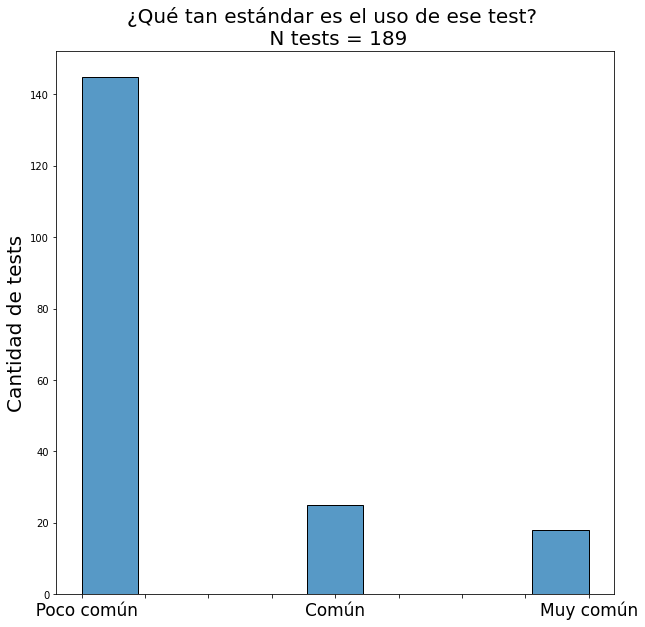

In [ ]:
a = sns.histplot(x='Es estandar', data=df_test_relevance)
plt.title(f'¿Qué tan estándar es el uso de ese test? \n N tests = 189', fontsize=20)
plt.xticks(fontsize= 11)
plt.ylabel('Cantidad de tests', fontsize=20)
plt.xlabel("", fontsize=20)
a.set_xticklabels(['','  Poco común','','','','Común','','','','Muy común','',''],fontsize=17)
plt.savefig('estandar_test')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


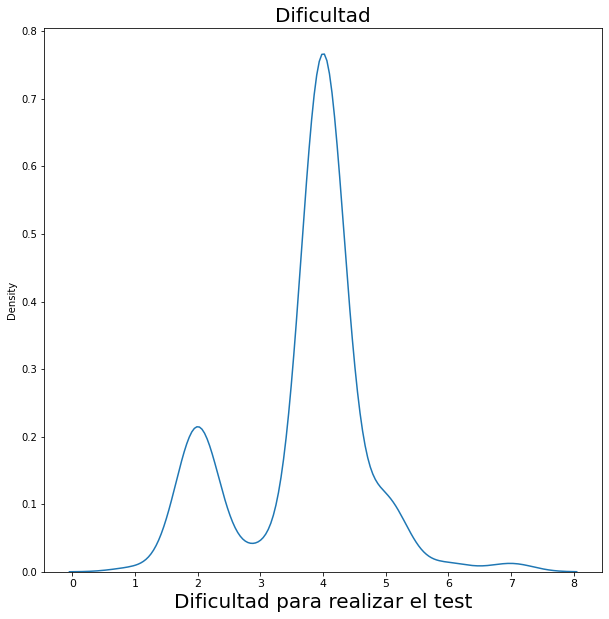

In [ ]:
a = sns.distplot(x=df_test_relevance['Dificultad (1 a 10)'], kde=True, hist=False)
plt.title('Dificultad', fontsize=20)
plt.xticks(fontsize= 11)
# plt.ylabel('Cantidad de tests', fontsize=20)
plt.xlabel("Dificultad para realizar el test", fontsize=20)
# a.set_xticklabels(['','Nada','','','','Poco','','','','Mucho','',''],fontsize=17)
plt.savefig('estandar_test')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


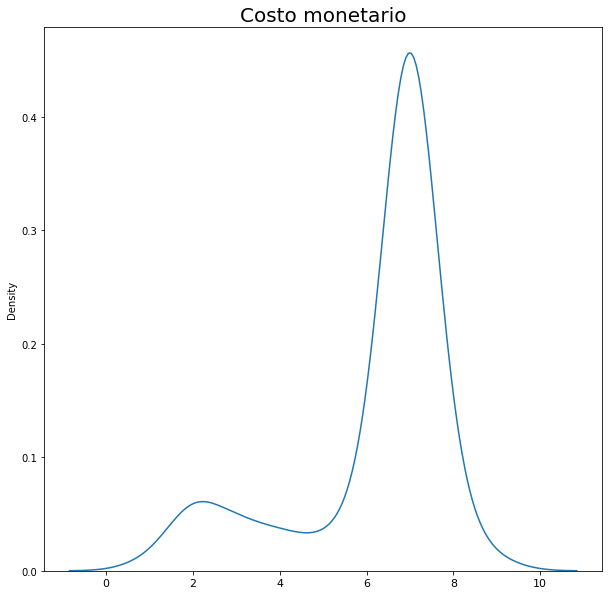

In [ ]:
a = sns.distplot(x=df_test_relevance['Costo monetario (1 a 10)'], kde=True, hist=False)
plt.title('Costo monetario', fontsize=20)
plt.xticks(fontsize= 11)
# plt.ylabel('Cantidad de tests', fontsize=20)
plt.xlabel("", fontsize=20)
# a.set_xticklabels(['','Nada','','','','Poco','','','','Mucho','',''],fontsize=17)
plt.savefig('estandar_test')
plt.show()

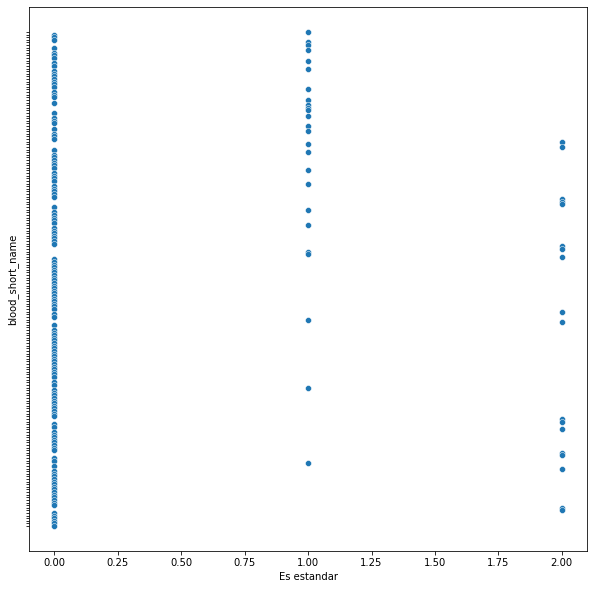

In [ ]:
a = sns.scatterplot(x='Es estandar', y= 'blood_short_name',  data=df_test_relevance)
# a.set_yticklabels(['','','',''],fontsize=17)
a.set(yticklabels = [])
plt.show()


In [ ]:
len(a[2])

146

In [ ]:
146*3

438